## About the Dataset

This dataset captures details on how **weather-related features** such as temperature, humidity, wind speed, cloud cover, and pressure relate to the likelihood of **rain**. The dataset contains information on weather conditions and is compiled across a period, providing insights into how various weather attributes influence precipitation. The dataset includes **2,500 rows** and **6 columns**.

### Key Information

- **Weather Features**:
  - **Temperature**: The ambient temperature in degrees Celsius.
  - **Humidity**: The percentage of moisture in the air.
  - **Wind Speed**: The speed of the wind in meters per second.
  - **Cloud Cover**: The percentage of sky covered by clouds.
  - **Pressure**: The atmospheric pressure in hectopascals (hPa).

- **Target Variable**:
  - **Rain**: Indicates whether it rained or not (binary classification: "rain" or "no rain").

### Column Descriptions

- **Temperature**: Ambient temperature in degrees Celsius.
- **Humidity**: The percentage of moisture present in the air.
- **Wind Speed**: The speed of wind measured in meters per second.
- **Cloud Cover**: The percentage of sky covered by clouds.
- **Pressure**: The atmospheric pressure recorded in hectopascals.
- **Rain**: The target variable, indicating whether it rained (1) or did not rain (0) based on the weather conditions. 

This dataset can be used to predict the likelihood of rain based on various weather parameters like temperature, humidity, and wind speed, which can be valuable for weather forecasting and climate studies.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)  
import warnings
warnings.filterwarnings('ignore') 

## Task 1: Preprocessing 

In [3]:
df = pd.read_csv("weather_forecast_data.csv")
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,19.096119,71.651723,14.782324,48.699257,987.954760,no rain
1,27.112464,84.183705,13.289986,10.375646,1035.430870,no rain
2,20.433329,42.290424,7.216295,6.673307,1033.628086,no rain
3,19.576659,40.679280,4.568833,55.026758,1038.832300,no rain
4,19.828060,93.353211,0.104489,30.687566,1009.423717,no rain


In [4]:
df.shape

(2500, 6)

In [5]:
print("Dataset Information: \n")
df.info()

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2475 non-null   float64
 1   Humidity     2460 non-null   float64
 2   Wind_Speed   2468 non-null   float64
 3   Cloud_Cover  2467 non-null   float64
 4   Pressure     2473 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


#### Unique Values and Value Counts

In [6]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in Rain:
Rain
no rain    2186
rain        314
Name: count, dtype: int64


# Data Cleaning

In [7]:
def Missing_Data_Check(df):
    print("\nMissing Data Check:")
    missing_data = df.isnull().sum()
    print(missing_data)


In [8]:
Missing_Data_Check(df)



Missing Data Check:
Temperature    25
Humidity       40
Wind_Speed     32
Cloud_Cover    33
Pressure       27
Rain            0
dtype: int64


#### Data Have missing Values lets identify them 

In [9]:
# display rows with missing data
print("\nRows with Missing Data:")
print(df[df.isnull().any(axis=1)])


Rows with Missing Data:
      Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
8             NaN  89.077804    4.842197    83.941093  1029.932706  no rain
25      26.420959  72.283460         NaN     0.812305  1018.818494  no rain
59      11.069078  89.683583    5.804538          NaN   992.303157  no rain
68            NaN  58.981077    6.261278    37.580222  1019.684713  no rain
74      33.078976  81.000650    5.744880    86.933978          NaN  no rain
...           ...        ...         ...          ...          ...      ...
2429          NaN  93.920582   13.302477    90.346087   998.183246     rain
2436    16.838551  86.248171   13.326615          NaN  1004.497445     rain
2445    14.279301        NaN   19.789469    95.934640  1031.653350     rain
2446    13.695217  95.727543         NaN    65.020145   983.800057     rain
2483    17.449257  70.094641         NaN    64.609907  1041.623220     rain

[153 rows x 6 columns]


In [10]:
# Duplicated data
print("Duplicates in df :", df.duplicated().sum())

Duplicates in df : 0


In [80]:
# Print the mean of the numeric columns
print("Dataset Mean Summary: \n")
print(df.select_dtypes(include=['float64']).mean())


Dataset Mean Summary: 

Temperature      22.573777
Humidity         64.366909
Wind_Speed        9.911826
Cloud_Cover      49.808770
Pressure       1014.409327
dtype: float64


In [12]:
# Display the number of unique values in each column of the dataset
print("Unique values in dataset:")
df_unique_counts = df.nunique()
print(df_unique_counts)

Unique values in dataset:
Temperature    2475
Humidity       2460
Wind_Speed     2468
Cloud_Cover    2467
Pressure       2473
Rain              2
dtype: int64


### Apply the two techniques to handle missing data, dropping missing values and replacing them with the average of the feature.

In [13]:
def handle_missing_data(df, method='replace'):
    df_copy = df.copy()
    
    if method == 'replace':
        df_copy.fillna(df_copy.select_dtypes(include=['float64']).mean(), inplace=True)
        print("Missing values have been replaced with the mean of each feature.")
        return df_copy
    elif method == 'drop':
        df_copy.dropna(inplace=True)
        print(f"Rows with missing values have been dropped. Remaining rows: {len(df_copy)}.")
        return df_copy
    else:
        print("Invalid method! Please use 'replace' or 'drop'.")
        return df_copy


In [14]:
df_cleaned_using_Replace = handle_missing_data(df, method='replace')

Missing values have been replaced with the mean of each feature.


In [15]:
df_cleaned_using_drop = handle_missing_data(df, method='drop') # original data 2500 row 

Rows with missing values have been dropped. Remaining rows: 2347.


In [16]:
Missing_Data_Check(df_cleaned_using_Replace)



Missing Data Check:
Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


In [17]:
Missing_Data_Check(df_cleaned_using_drop)



Missing Data Check:
Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


In [18]:
# Identifying numerical and non-numerical columns in the dataset
numerical_df = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_df = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print("\nNumerical columns in the dataset:")
print(numerical_df)

print("\nNon-numerical columns in the dataset:")
print(non_numerical_df)


Numerical columns in the dataset:
['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

Non-numerical columns in the dataset:
['Rain']


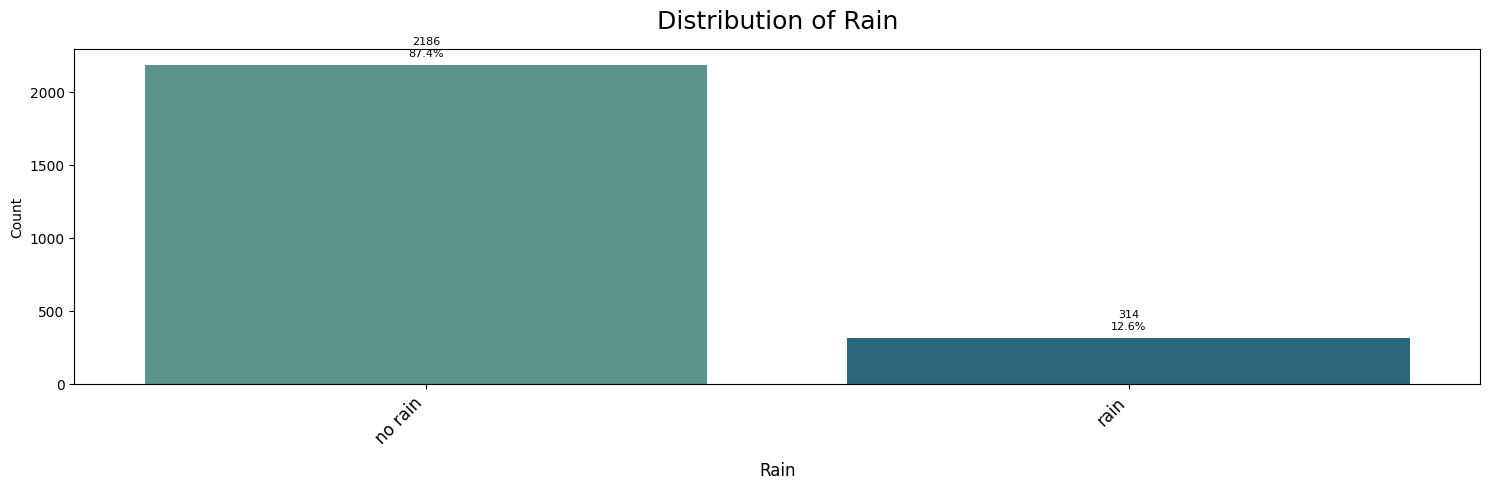

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bar_graphs(df, columns):
    for column in columns:
        fig, ax = plt.subplots(figsize=(15, 5))

        sns.countplot(x=column, data=df, order=df[column].value_counts().index, ax=ax, palette="crest")

        total = len(df[column])  
        for p in ax.patches:
            count = int(p.get_height())
            percentage = f'{count / total:.1%}'  
            ax.annotate(f'{count}\n{percentage}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=8, color='black',
                        xytext=(0, 5), textcoords='offset points')

        ax.set_xlabel(column.replace('_', ' ').title(), fontsize=12, labelpad=10)
        ax.set_ylabel('Count', fontsize=10)
        ax.set_title(f'Distribution of {column.replace("_", " ").title()}', fontsize=18, pad=15)

        plt.xticks(rotation=45, ha='right', fontsize=12)
        
        plt.tight_layout()
        plt.show()

# Categorical feature 'Rain' from your dataset
cat_features = ['Rain']

plot_bar_graphs(df, cat_features)


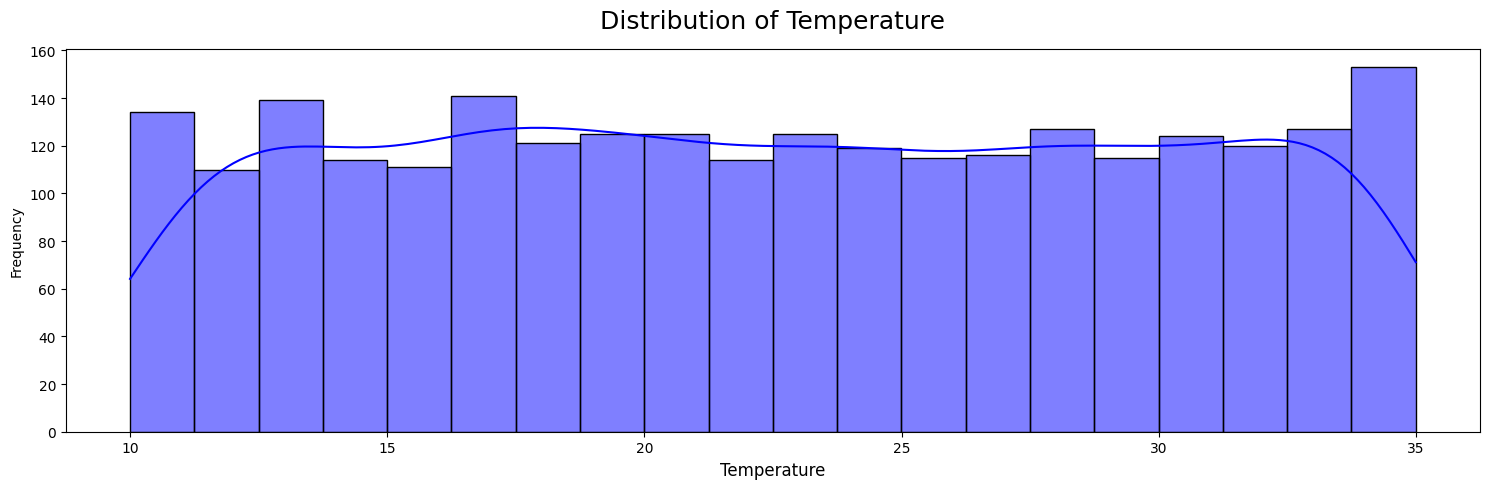

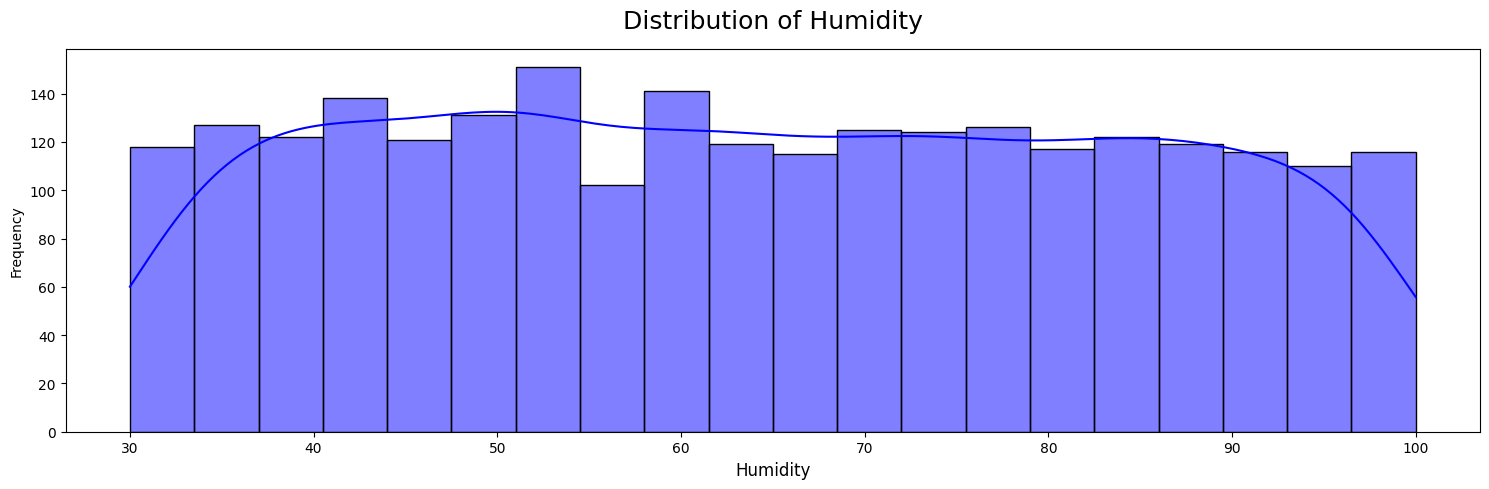

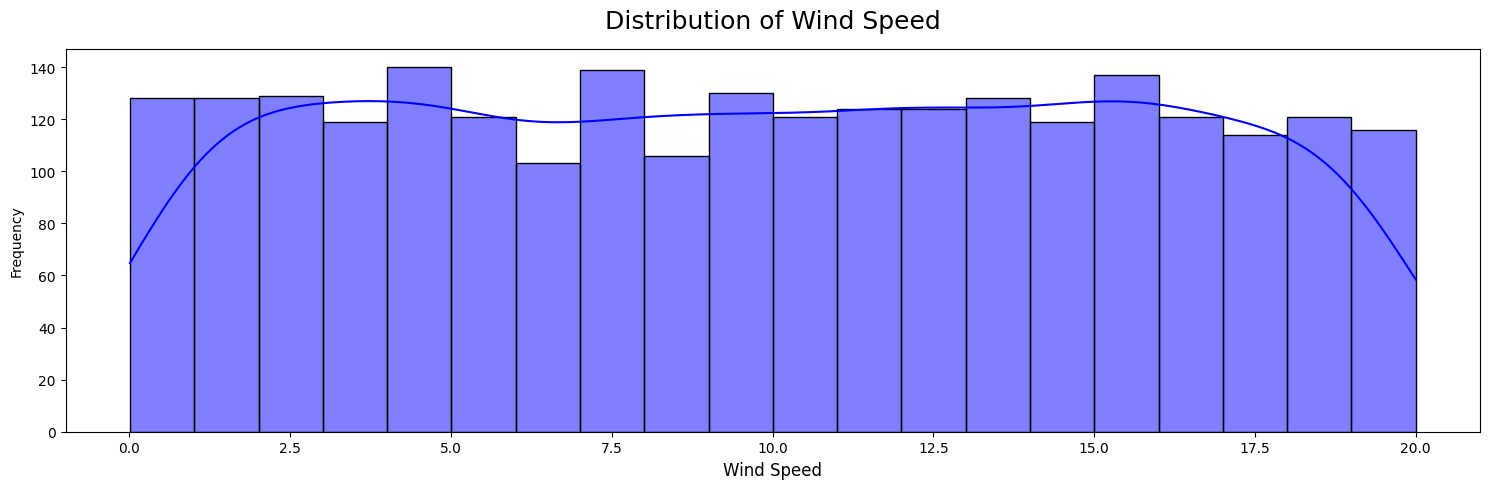

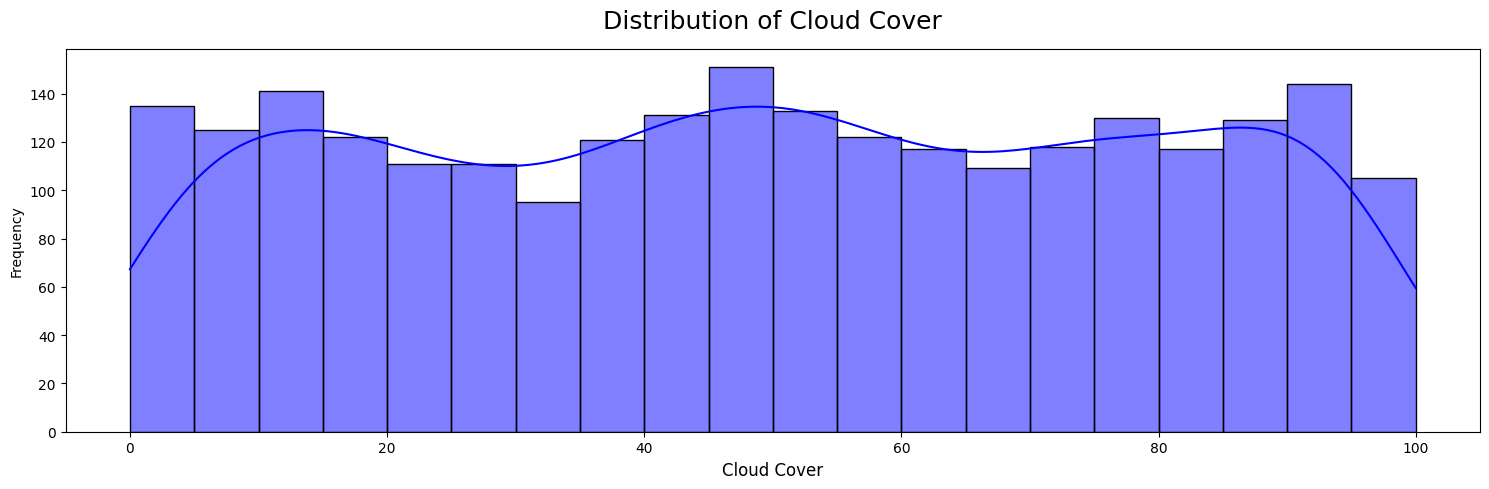

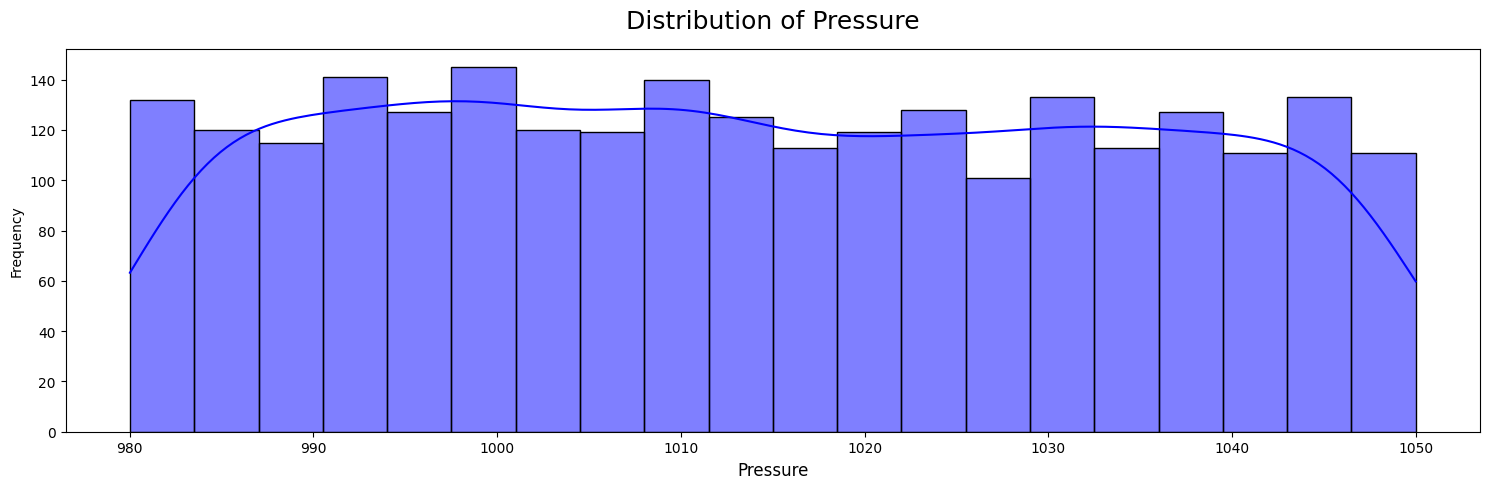

In [20]:
def plot_histograms(df, columns):
    for column in columns:
        fig, ax = plt.subplots(figsize=(15, 5))

        sns.histplot(df[column], kde=True, ax=ax, color="blue", bins=20)  # You can adjust bins for better clarity
        ax.set_xlabel(column.replace('_', ' ').title(), fontsize=12)
        ax.set_ylabel('Frequency', fontsize=10)
        ax.set_title(f'Distribution of {column.replace("_", " ").title()}', fontsize=18, pad=15)

        plt.tight_layout()
        plt.show()

# Numerical features from your dataset
num_features = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

plot_histograms(df, num_features)


# Check whether numeric features have the same scale


In [21]:
df_cleaned_using_Replace.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,2500.0,22.573777,7.295628,10.001842,16.417898,22.573777,28.934369,34.995214
Humidity,2500.0,64.366909,19.813325,30.005071,47.493987,64.366909,81.445049,99.997481
Wind_Speed,2500.0,9.911826,5.743575,0.009819,4.829795,9.911826,14.889660,19.999132
Cloud_Cover,2500.0,49.808770,28.869772,0.015038,24.817296,49.808770,74.989410,99.997795
Pressure,2500.0,1014.409327,20.072933,980.014486,997.190281,1014.095390,1031.606187,1049.985593


In [22]:
def plot_Box_plot(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df.select_dtypes(include='float64'))
    plt.xticks(rotation=45)
    plt.title("Comparison of Numeric Feature Scales")
    plt.show()

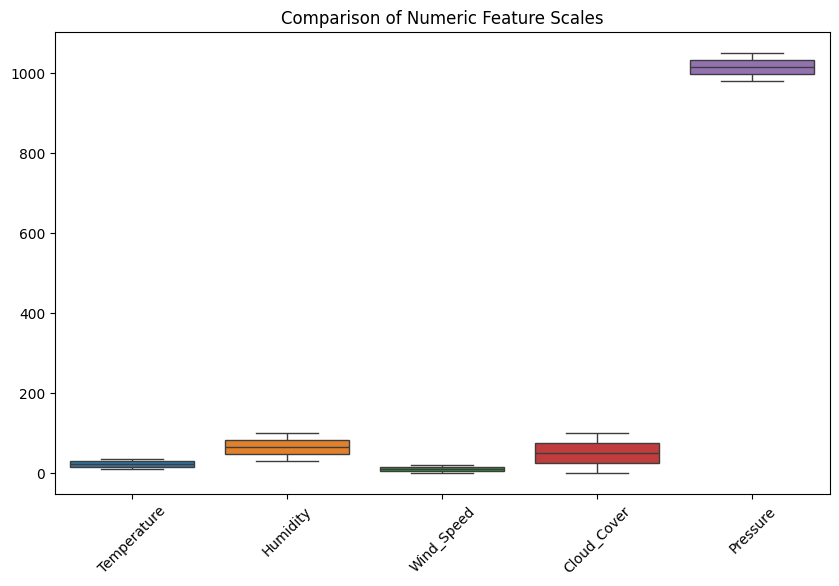

In [23]:
plot_Box_plot(df_cleaned_using_Replace)

### Check whether Numeric Features Have the Same Scale

The numeric features do not appear to be on the same scale. Here’s why:

| Feature      | Mean       | Min        | Max        |
|--------------|------------|------------|------------|
| Temperature  | 22.573777  | 10.001842  | 34.995214  |
| Humidity     | 64.366909  | 30.005071  | 99.997481  |
| Wind_Speed   | 9.911826   | 0.009819   | 19.999132  |
| Cloud_Cover  | 49.808770  | 0.015038   | 99.997795  |
| Pressure     | 1014.409327| 980.014486 | 1049.985593|


The features have different ranges, means, and standard deviations, confirming that they are not on the same scale. This could affect certain analyses and models. To improve model performance, you might need to normalize or standardize these features to bring them to the same scale.

### Note : We will apply scaling After **Spliting Data Into Train and Test**

#### Sperate Data Into Train and Test

In [24]:
from sklearn.model_selection import train_test_split

def Sepearating_features_and_targets(df):
    X = df.drop(columns=['Rain'])  
    y = df['Rain']   

    print("Features : \n")
    print(X.head())
    print(X.shape)

    print("\n Targets :")
    print(y.head())
    print(y.shape)
    return X,y

In [25]:
X,y=Sepearating_features_and_targets(df_cleaned_using_Replace)

Features : 

   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure
0    19.096119  71.651723   14.782324    48.699257   987.954760
1    27.112464  84.183705   13.289986    10.375646  1035.430870
2    20.433329  42.290424    7.216295     6.673307  1033.628086
3    19.576659  40.679280    4.568833    55.026758  1038.832300
4    19.828060  93.353211    0.104489    30.687566  1009.423717
(2500, 5)

 Targets :
0    no rain
1    no rain
2    no rain
3    no rain
4    no rain
Name: Rain, dtype: object
(2500,)


In [26]:
def Split_the_data_into_training_and_testing_sets(X,y):
    # Split the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Training data shape (X_train): ", X_train.shape)
    print("Testing data shape (X_test): ", X_test.shape)
    print("Training target shape (y_train): ", y_train.shape)
    print("Testing target shape (y_test): ", y_test.shape)
    return X_train, X_test, y_train, y_test

In [27]:
X_train, X_test, y_train, y_test = Split_the_data_into_training_and_testing_sets(X,y)

Training data shape (X_train):  (2000, 5)
Testing data shape (X_test):  (500, 5)
Training target shape (y_train):  (2000,)
Testing target shape (y_test):  (500,)


#### Encoding For Target Column

In [28]:
from sklearn.preprocessing import LabelEncoder


def Encode_Target(y_train,y_test,label_encoder):

    y_train = pd.DataFrame(y_train)  
    y_test = pd.DataFrame(y_test)    

    y_train['Rain'] = label_encoder.fit_transform(y_train['Rain'])
    y_test['Rain'] = label_encoder.transform(y_test['Rain'])


    print("\nEncoded Training Target (y_train):")
    print(y_train)

    print("\nEncoded Test Target (y_test):")
    print(y_test)
    return y_train,y_test

In [29]:
label_encoder = LabelEncoder()
y_train,y_test=Encode_Target(y_train,y_test,label_encoder)



Encoded Training Target (y_train):
      Rain
2055     0
1961     0
1864     0
2326     1
461      0
...    ...
1638     0
1095     0
1130     0
1294     0
860      0

[2000 rows x 1 columns]

Encoded Test Target (y_test):
      Rain
1447     0
1114     0
1064     0
2287     1
1537     0
...    ...
2375     1
1609     0
596      0
84       0
2213     1

[500 rows x 1 columns]


### Scaling numeric features 


We use **StandardScaler**  to standardize numeric columns in the dataset. Standardization is the process of scaling features so they have a mean of 0 and a standard deviation of 1, which helps algorithms perform better by ensuring that features contribute equally.
The formula for standardization is:

The standardization equation is:

$$
z = \frac{x - \mu}{\sigma}
$$

where:
- $x$ is the original feature value,
- $\mu$ is the mean of the feature in the training set,
- $\sigma$ is the standard deviation of the feature in the training set,
- $z$ is the standardized value.



In [30]:
from sklearn.preprocessing import StandardScaler
def Scale_Data(X_train,X_test):
    numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

    scaler = StandardScaler()

    X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

    X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

    print("Standardized Training Data:")
    print(X_train.head())

    print("\nStandardized Test Data:")
    print(X_test.head())
    return X_train,X_test


In [31]:
X_train,X_test=Scale_Data(X_train,X_test)


Standardized Training Data:
      Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
2055    -1.718125  1.687949    1.697663    -0.229740 -0.142129
1961     0.578604 -1.222505    1.195252     0.013527  1.749370
1864    -1.611123 -1.677586    0.944283    -0.392969  1.456590
2326    -1.293667  0.840139    1.180401     0.752595  0.044229
461     -1.366615  0.086746    0.063829     0.285025 -0.950329

Standardized Test Data:
      Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
1447    -0.439931  0.875070   -0.813364    -0.506291 -0.419847
1114    -1.725871 -0.290745   -1.281728    -0.091093 -1.481063
1064     1.166779  1.504868    0.490502    -1.364309  0.767471
2287    -1.184871  1.141692   -0.207549     0.641584  1.570095
1537     1.265119 -1.192291   -0.882951    -1.709711  1.253436


In [32]:
# display the mean and standard deviation after standardization
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
print("\nMean after Standardization:")
print(X_train[numeric_columns].mean())
print("\nStandard Deviation after Standardization:")
print(X_train[numeric_columns].std())


Mean after Standardization:
Temperature    5.213607e-16
Humidity      -5.311307e-16
Wind_Speed    -6.572520e-17
Cloud_Cover    3.197442e-17
Pressure       2.018830e-15
dtype: float64

Standard Deviation after Standardization:
Temperature    1.00025
Humidity       1.00025
Wind_Speed     1.00025
Cloud_Cover    1.00025
Pressure       1.00025
dtype: float64


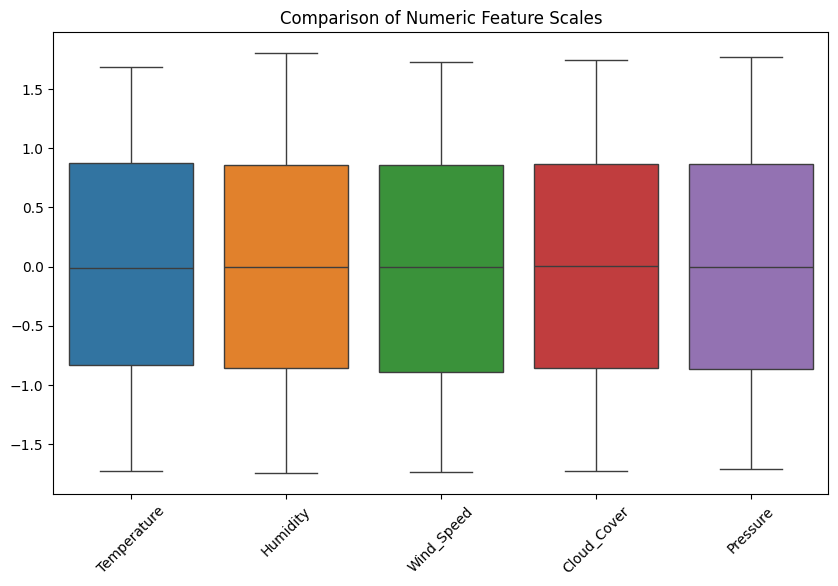

In [33]:
plot_Box_plot(X_train)

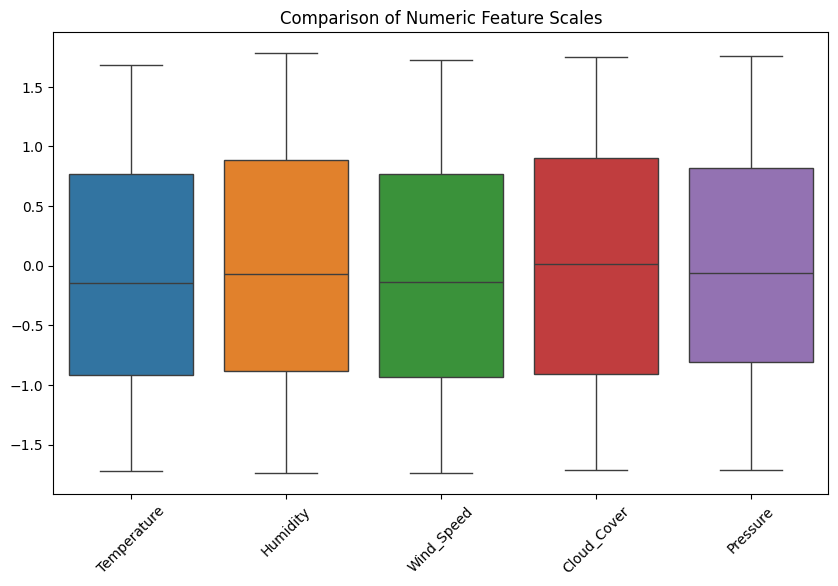

In [34]:
plot_Box_plot(X_test)

## Task 2: Implement Decision Tree, k-Nearest Neighbors (kNN) and naïve Bayes 
### Note This Models using Dataframe which handled missing values using -- **Replace By Average Technique**

In [35]:
from sklearn.metrics import classification_report

def print_classification_report(model_name,y_test, y_pred):
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))


In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model_name,y_test, y_pred):
    y_true_original = label_encoder.inverse_transform(y_test)
    y_pred_original = label_encoder.inverse_transform(y_pred)
    cm = confusion_matrix(y_true_original, y_pred_original)
    unique_classes = sorted(set(y_true_original) | set(y_pred_original))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def Decision_Tree(X_train,X_test,y_train,y_test):
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_dt)
    print(f'Accuracy of the Decsion Tree model on the test set: {accuracy:.4f}')
    return y_pred_dt

In [38]:
y_pred_dt=Decision_Tree(X_train,X_test,y_train,y_test)

Accuracy of the Decsion Tree model on the test set: 0.9960


In [39]:
print_classification_report("Decsion Tree",y_test,y_pred_dt)
    



Classification Report for Decsion Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       444
           1       1.00      0.96      0.98        56

    accuracy                           1.00       500
   macro avg       1.00      0.98      0.99       500
weighted avg       1.00      1.00      1.00       500



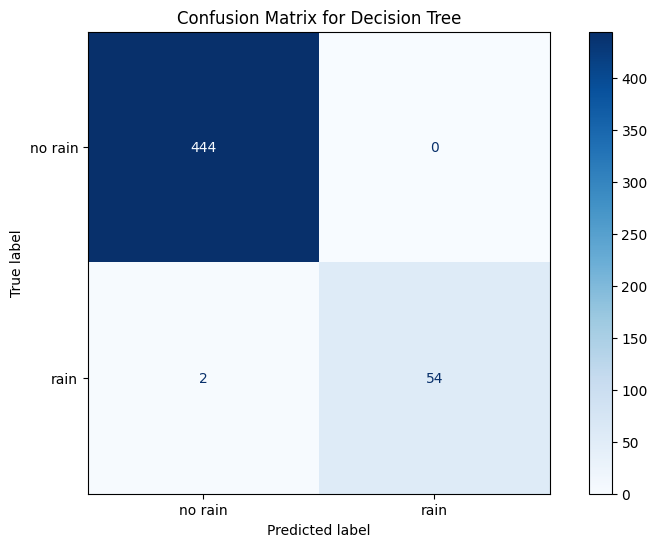

In [40]:
plot_confusion_matrix("Decision Tree",y_test,y_pred_dt)

### k-Nearest Neighbors (kNN)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
def Knn(X_train,X_test,y_train,y_test, n_neighbors):
    knn_model = KNeighborsClassifier(n_neighbors)  
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    print(f'Accuracy of the KNN model on the test set: {accuracy:.4f}')
    return y_pred_knn

In [42]:
y_pred_knn=Knn(X_train,X_test,y_train,y_test, 5)

Accuracy of the KNN model on the test set: 0.9680


In [43]:
print_classification_report("kNN using Skit-learn",y_test,y_pred_knn)

Classification Report for kNN using Skit-learn:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       444
           1       0.92      0.79      0.85        56

    accuracy                           0.97       500
   macro avg       0.95      0.89      0.91       500
weighted avg       0.97      0.97      0.97       500



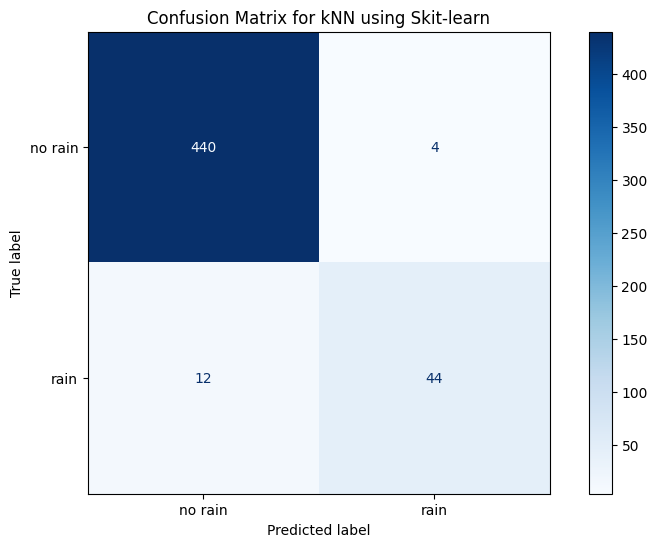

In [44]:
plot_confusion_matrix("kNN using Skit-learn",y_test,y_pred_knn)

### Naïve Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
def Naïve_Bayes(X_train,X_test,y_train,y_test):
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_nb)
    print(f'Accuracy of the Naïve Bayes model on the test set: {accuracy:.4f}')
    return y_pred_nb

In [46]:
y_pred_nb=Naïve_Bayes(X_train,X_test,y_train,y_test)

Accuracy of the Naïve Bayes model on the test set: 0.9640


In [47]:
print_classification_report("Naïve Bayes",y_test,y_pred_nb)

Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       444
           1       1.00      0.68      0.81        56

    accuracy                           0.96       500
   macro avg       0.98      0.84      0.89       500
weighted avg       0.97      0.96      0.96       500



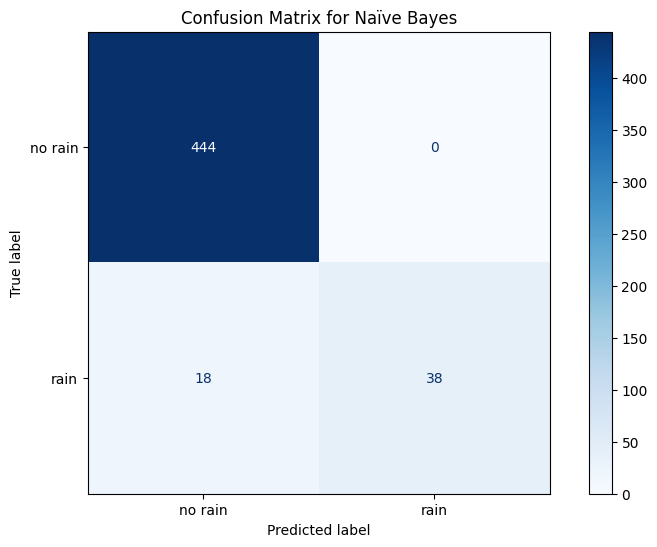

In [48]:
plot_confusion_matrix("Naïve Bayes",y_test,y_pred_nb)

### Compare Performace of 3 Algorithms:

1. **Decision Tree**:
   - **Precision**: Perfect (1.00) for both "no rain" and "rain" classes.
   - **Recall**: Perfect for "no rain" (1.00) but slightly lower for "rain" (0.96).
   - **F1-Score**: Near-perfect for "rain" (0.98) and perfect for "no rain" (1.00).
   - **Accuracy**: 100% (best among the three).
   - **Confusion Matrix**:
     - Only 2 false negatives (classifying "rain" as "no rain").
   - **Overall**: The Decision Tree is the most accurate, performing well for both classes.

2. **kNN**:
   - **Precision**: 0.97 for "no rain" and 0.92 for "rain."
   - **Recall**: 0.99 for "no rain," but only 0.79 for "rain."
   - **F1-Score**: 0.98 for "no rain" and 0.85 for "rain."
   - **Accuracy**: 97%.
   - **Confusion Matrix**:
     - 4 false positives (classifying "no rain" as "rain").
     - 12 false negatives (classifying "rain" as "no rain").
   - **Overall**: Performs well but struggles more with the "rain" class compared to the Decision Tree.

3. **Naïve Bayes**:
   - **Precision**: 0.96 for "no rain" and 1.00 for "rain."
   - **Recall**: 1.00 for "no rain," but only 0.68 for "rain."
   - **F1-Score**: 0.98 for "no rain" and 0.81 for "rain."
   - **Accuracy**: 96% (lowest among the three).
   - **Confusion Matrix**:
     - 18 false negatives (classifying "rain" as "no rain").
   - **Overall**: Struggles significantly with detecting "rain," despite high precision for the "rain" class.

The **Decision Tree** is the best overall performer, with perfect accuracy and minimal false negatives.



### Implement k-Nearest Neighbors (kNN) algorithm from scratch


In [49]:
def initialize_knn(k=3):
    return {"k": k, "X_train": None, "y_train": None}


In [50]:
def fit_knn(model, X_train, y_train):
    model["X_train"] = np.array(X_train)
    model["y_train"] = np.array(y_train)

### Euclidean Distance

The Euclidean distance is a measure of the straight-line distance between two points in multi-dimensional space. It is given by the formula:

$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$



In [51]:
def euclidean_distance(X_train, x_test):
    X_train = np.array(X_train, dtype=np.float64)
    x_test = np.array(x_test, dtype=np.float64)
    
    differences = X_train - x_test
    squared_differences = differences ** 2
    sum_squared_differences = np.sum(squared_differences, axis=1)
    distances = np.sqrt(sum_squared_differences)
    return distances


In [52]:
def get_k_neighbors(distances, y_train, k):
    k_indices = np.argsort(distances)[:k]
    k_labels = y_train[k_indices]
    
    return k_labels  



In [53]:
from collections import Counter
import numpy as np

def predict_knn(model, X_test):
    predictions = []
    
    X_test = np.array(X_test)
    
    for i in range(X_test.shape[0]):  
        x_test = X_test[i]          
        distances = euclidean_distance(model["X_train"], x_test)  
        neighbors = get_k_neighbors(distances, model["y_train"], model["k"])  
        neighbors = [label for label in neighbors]
        most_common = Counter(neighbors).most_common(1)
        predictions.append(most_common[0][0])  # Append the predicted label
    
    return np.array(predictions)


In [54]:
knn_model = initialize_knn(k=5)

fit_knn(knn_model, X_train, np.array(y_train).ravel())

y_pred_knn_from_Scratch = predict_knn(knn_model, X_test)
accuracy = accuracy_score(y_test, y_pred_knn_from_Scratch)
print(f'Accuracy of the KNN model from scratch on the test set: {accuracy:.4f}')


Accuracy of the KNN model from scratch on the test set: 0.9680


In [55]:
print_classification_report("Knn model From Scratch",y_test,y_pred_knn_from_Scratch)

Classification Report for Knn model From Scratch:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       444
           1       0.92      0.79      0.85        56

    accuracy                           0.97       500
   macro avg       0.95      0.89      0.91       500
weighted avg       0.97      0.97      0.97       500



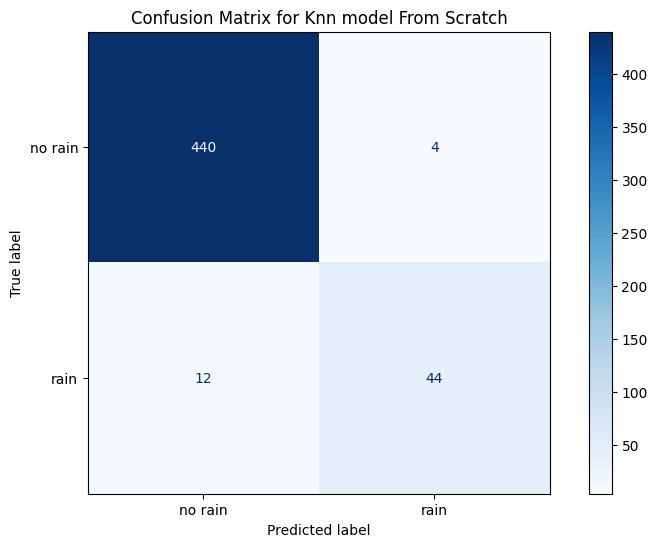

In [56]:
plot_confusion_matrix("Knn model From Scratch",y_test,y_pred_knn_from_Scratch)

##### Report the results and compare the performance of your custom k Nearest Neighbors (kNN) implementation with the pre-built kNN algorithms in scikit-learn using Replacing Technique in Handling Missing values



### **Classification Report Comparison**
Both implementations produced identical classification metrics, indicating that their performances are identical in terms of precision, recall, F1-score, and overall accuracy.

| Metric        | Class 0 (No Rain) | Class 1 (Rain) | Accuracy |
|---------------|-------------------|----------------|----------|
| **Precision** | 0.97              | 0.92           | 0.97     |
| **Recall**    | 0.99              | 0.79           |          |
| **F1-score**  | 0.98              | 0.85           |          |



### **Confusion Matrix Comparison**
Both implementations produced the same confusion matrix:

| **Predicted →**    | **No Rain** | **Rain** |
|--------------------|-------------|----------|
| **Actual No Rain** | 440         | 4        |
| **Actual Rain**    | 12          | 44       |


***Both implementations performed identically on this dataset***







## Task 3: Interpreting the Decision Tree and Evaluation Metrics Report

### Trying The Same Models But Using Different Missing Values Handling Technique -- Drop Missing Values 

#### Processing 

In [57]:
X2,y2=Sepearating_features_and_targets(df_cleaned_using_drop)

Features : 

   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure
0    19.096119  71.651723   14.782324    48.699257   987.954760
1    27.112464  84.183705   13.289986    10.375646  1035.430870
2    20.433329  42.290424    7.216295     6.673307  1033.628086
3    19.576659  40.679280    4.568833    55.026758  1038.832300
4    19.828060  93.353211    0.104489    30.687566  1009.423717
(2347, 5)

 Targets :
0    no rain
1    no rain
2    no rain
3    no rain
4    no rain
Name: Rain, dtype: object
(2347,)


In [58]:
X2_train, X2_test, y2_train, y2_test = Split_the_data_into_training_and_testing_sets(X2,y2)

Training data shape (X_train):  (1877, 5)
Testing data shape (X_test):  (470, 5)
Training target shape (y_train):  (1877,)
Testing target shape (y_test):  (470,)


In [59]:
label_encoder2=LabelEncoder()
y2_train,y2_test=Encode_Target(y2_train,y2_test,label_encoder2)


Encoded Training Target (y_train):
      Rain
1956     0
601      0
314      0
992      0
255      0
...    ...
1747     0
1162     0
1199     0
1371     0
917      0

[1877 rows x 1 columns]

Encoded Test Target (y_test):
      Rain
1490     0
710      0
2130     0
861      0
2028     0
...    ...
343      0
2380     1
396      0
891      0
1652     0

[470 rows x 1 columns]


In [60]:
X2_train,X2_test=Scale_Data(X2_train,X2_test)

Standardized Training Data:
      Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
1956    -1.436476  0.273962   -1.504461     1.188434  0.381219
601     -0.053858 -1.595632   -0.752746     1.707058 -1.545006
314     -0.470093 -0.690259   -0.021115    -0.622645  0.917345
992      0.178123 -1.625476    1.294497     0.213524 -1.690423
255      1.526901 -1.134649   -0.797317    -0.348984  0.888535

Standardized Test Data:
      Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
1490    -0.260826 -1.358558    0.829739    -0.692056 -0.070387
710     -0.116059 -0.886083    0.084865    -0.467499  0.984156
2130     1.422790  1.776448   -0.451182     0.934342  1.589956
861      1.330837  0.165115   -0.355094     1.401501  0.330636
2028     0.941170 -1.280496   -0.492945     0.287127 -0.294605


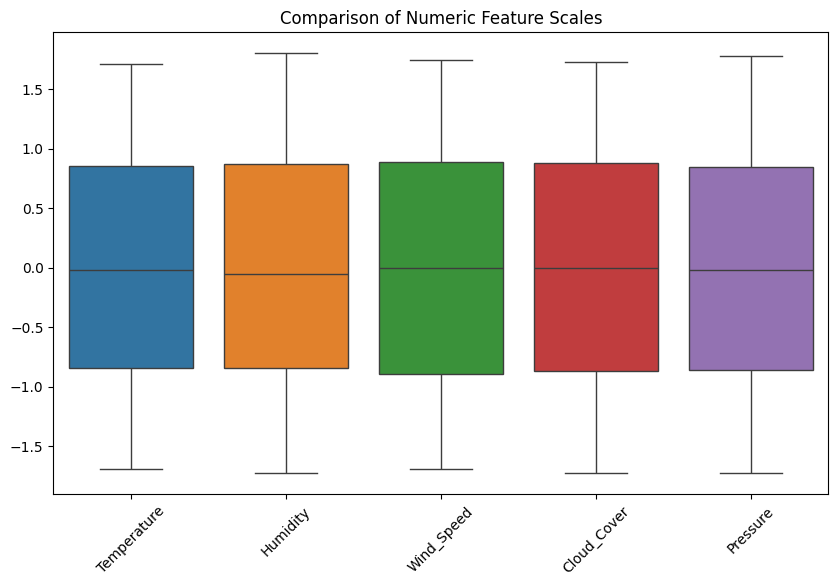

In [61]:
plot_Box_plot(X2_train)

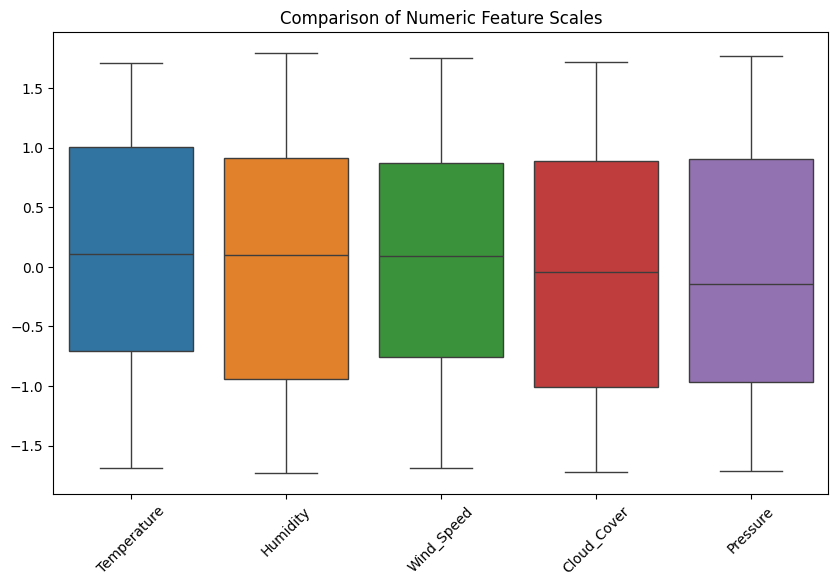

In [62]:
plot_Box_plot(X2_test)

### Models using DF handeled by Drop missing Values

#### Descion Tree

In [63]:
y_pred_dt2=Decision_Tree(X2_train,X2_test,y2_train,y2_test)

Accuracy of the Decsion Tree model on the test set: 0.9979


In [64]:
print_classification_report("Descion Tree",y2_test,y_pred_dt2)

Classification Report for Descion Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      0.99      0.99        68

    accuracy                           1.00       470
   macro avg       1.00      0.99      1.00       470
weighted avg       1.00      1.00      1.00       470



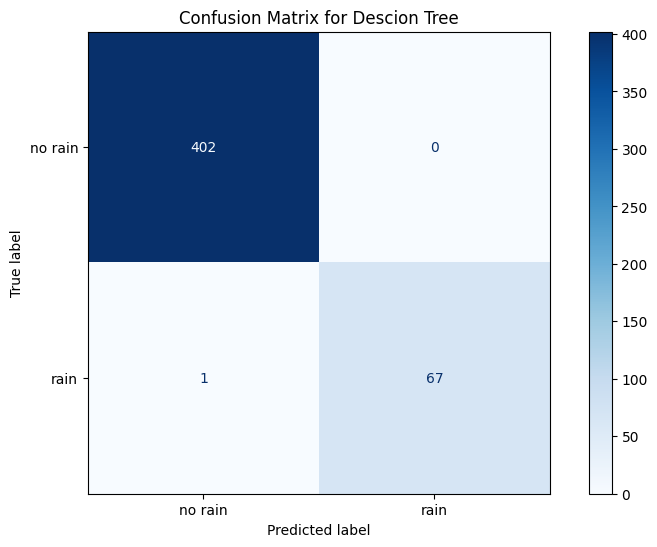

In [65]:
plot_confusion_matrix("Descion Tree",y2_test,y_pred_dt2)

#### Knn

In [66]:
y_pred_knn2=Knn(X2_train,X2_test,y2_train,y2_test,5)

Accuracy of the KNN model on the test set: 0.9617


In [67]:
print_classification_report("knn",y2_test,y_pred_knn2)

Classification Report for knn:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       402
           1       0.89      0.84      0.86        68

    accuracy                           0.96       470
   macro avg       0.93      0.91      0.92       470
weighted avg       0.96      0.96      0.96       470



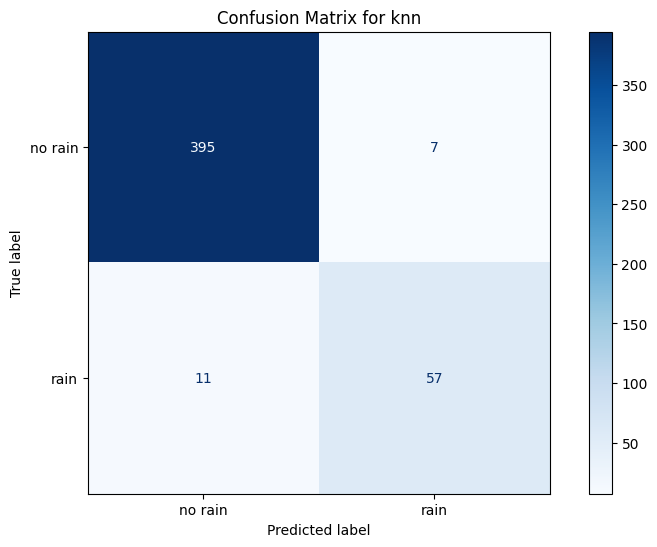

In [68]:
plot_confusion_matrix("knn",y2_test,y_pred_knn2)

#### Naïve Bayes

In [69]:
y_pred_nb2=Naïve_Bayes(X2_train,X2_test,y2_train,y2_test)

Accuracy of the Naïve Bayes model on the test set: 0.9617


In [70]:
print_classification_report("Naïve Bayes",y2_test,y_pred_nb2)

Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       402
           1       1.00      0.74      0.85        68

    accuracy                           0.96       470
   macro avg       0.98      0.87      0.91       470
weighted avg       0.96      0.96      0.96       470



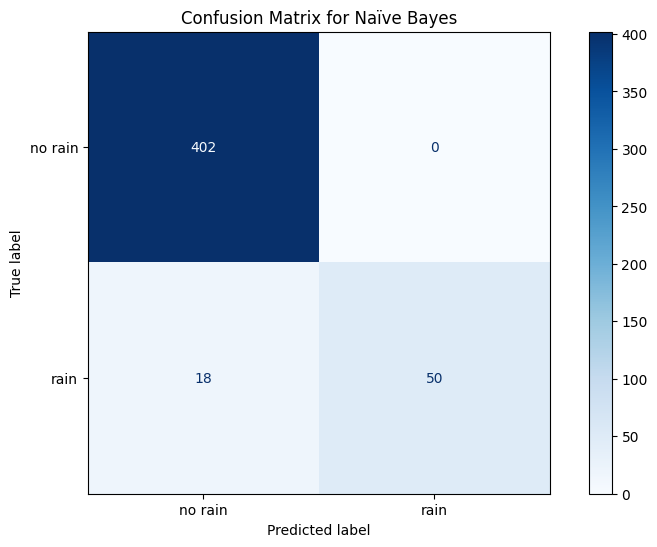

In [71]:
plot_confusion_matrix("Naïve Bayes",y2_test,y_pred_nb2)

### **1. The effect of different data handling**

## Comparison of Decision Tree Performance with Different Missing Value Handling Techniques

### 1. Replacing Missing Values with Average

**Classification Report:**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 1.00      | 1.00   | 1.00     | 444     |
| 1     | 1.00      | 0.96   | 0.98     | 56      |

- **Accuracy:** 1.00  
 

**Confusion Matrix:**

| True Label / Predicted Label | No Rain | Rain |
|------------------------------|---------|------|
| No Rain                      | 444     | 0    |
| Rain                         | 2       | 54   |


### 2. Dropping Missing Values

**Classification Report:**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 1.00      | 1.00   | 1.00     | 402     |
| 1     | 1.00      | 0.99   | 0.99     | 68      |

**Overall Metrics:**
- **Accuracy:** 1.00  


**Confusion Matrix:**

| True Label / Predicted Label | No Rain | Rain |
|------------------------------|---------|------|
| No Rain                      | 402     | 0    |
| Rain                         | 1       | 67   |

---

Both techniques achieved perfect accuracy (1.00), but subtle differences in other metrics were observed:

1. **Recall for "Rain" Class**: Slightly higher when dropping missing values (0.99) compared to replacing them with the average (0.96).
2. **F1-Score for "Rain" Class**: Marginally better when dropping missing values (0.99 vs. 0.98).
3. **Confusion Matrix**: Both models showed excellent classification of "No Rain" samples, with minor differences in misclassification rates for the "Rain" class.

Replacing missing values allowed for a larger training dataset, which may benefit generalization in other scenarios.



## Comparison of kNN Performance with Different Missing Value Handling Techniques

### 1. Replacing Missing Values with Average

**Classification Report:**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.97      | 0.99   | 0.98     | 444     |
| 1     | 0.92      | 0.79   | 0.85     | 56      |

- **Accuracy:** 0.97  
 

**Confusion Matrix:**

| True Label / Predicted Label | No Rain | Rain |
|------------------------------|---------|------|
| No Rain                      | 440     | 4    |
| Rain                         | 12      | 44   |


### 2. Dropping Missing Values

**Classification Report:**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.97      | 0.98   | 0.98     | 402     |
| 1     | 0.89      | 0.84   | 0.86     | 68      |

**Overall Metrics:**
- **Accuracy:** 0.96  


**Confusion Matrix:**

| True Label / Predicted Label | No Rain | Rain |
|------------------------------|---------|------|
| No Rain                      | 395     | 7    |
| Rain                         | 11      | 57   |

---


1. **Replacing Missing Values with Average**:
   - Slightly improved overall accuracy (0.97 vs. 0.96 when dropping values).
   - Precision and recall for the "Rain" class were lower, with a higher number of misclassified "Rain" samples (12 vs. 11).

2. **Dropping Missing Values**:
   - Lower accuracy (0.96), but better recall (0.84) and F1-score (0.86) for the "Rain" class.
   - More balanced results, with fewer false positives for the "Rain" class (7 vs. 4).

3. **Trade-offs**:
   - Replacing missing values preserves a larger dataset, potentially enhancing model generalization.
   - Dropping missing values improves performance for the minority "Rain" class, making it more effective at detecting "Rain."


## Comparison of Naïve Bayes Performance with Different Missing Value Handling Techniques

### 1. Replacing Missing Values with Average

**Classification Report:**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.96      | 1.00   | 0.98     | 444     |
| 1     | 1.00      | 0.68   | 0.81     | 56      |

**Overall Metrics:**
- **Accuracy:** 0.96  

**Confusion Matrix:**

| True Label / Predicted Label | No Rain | Rain |
|------------------------------|---------|------|
| No Rain                      | 444     | 0    |
| Rain                         | 18      | 38   |

---

### 2. Dropping Missing Values

**Classification Report:**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.96      | 1.00   | 0.98     | 402     |
| 1     | 1.00      | 0.74   | 0.85     | 68      |

**Overall Metrics:**
- **Accuracy:** 0.96  

**Confusion Matrix:**

| True Label / Predicted Label | No Rain | Rain |
|------------------------------|---------|------|
| No Rain                      | 402     | 0    |
| Rain                         | 18      | 50   |

---


1. **Replacing Missing Values with Average**:
   - Maintains **96% accuracy**.
   - **Lower recall and F1-score for "Rain"** (0.68 and 0.81 respectively), leading to more misclassified "Rain" cases (18 false negatives).

2. **Dropping Missing Values**:
   - Keeps **96% accuracy**.
   - **Improved recall and F1-score for "Rain"** (0.74 and 0.85), with fewer false negatives.

3. **Trade-offs**:
   - **Replacing missing values** keeps more data but sacrifices recall for the minority class.
   - **Dropping missing values** reduces dataset size but better detects "Rain", improving the model's effectiveness for the minority class.



### 2. Decision Tree Explanation Report

A decision tree is a supervised learning algorithm used for classification and regression tasks.
It makes predictions by splitting the data into smaller subsets based on specific criteria until a prediction can be made.
The splits are made using measures like **Entropy and information Gain**.


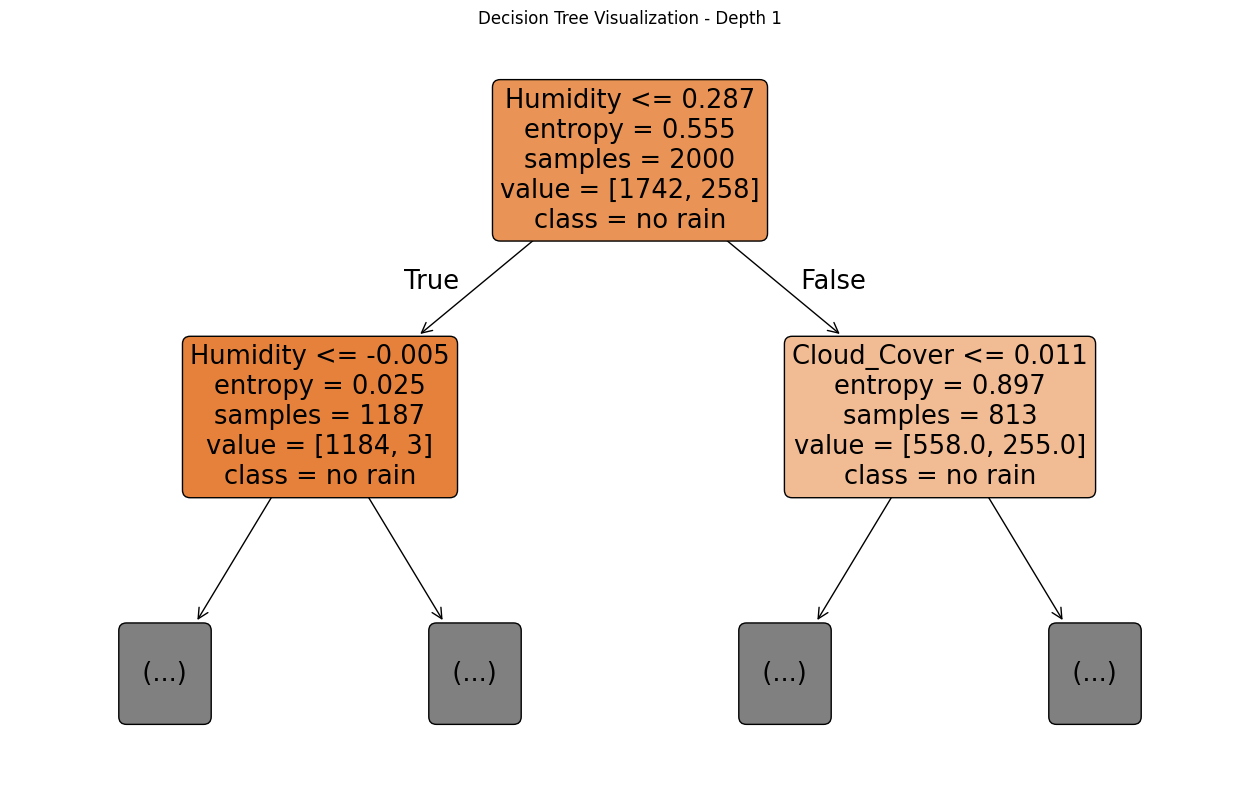

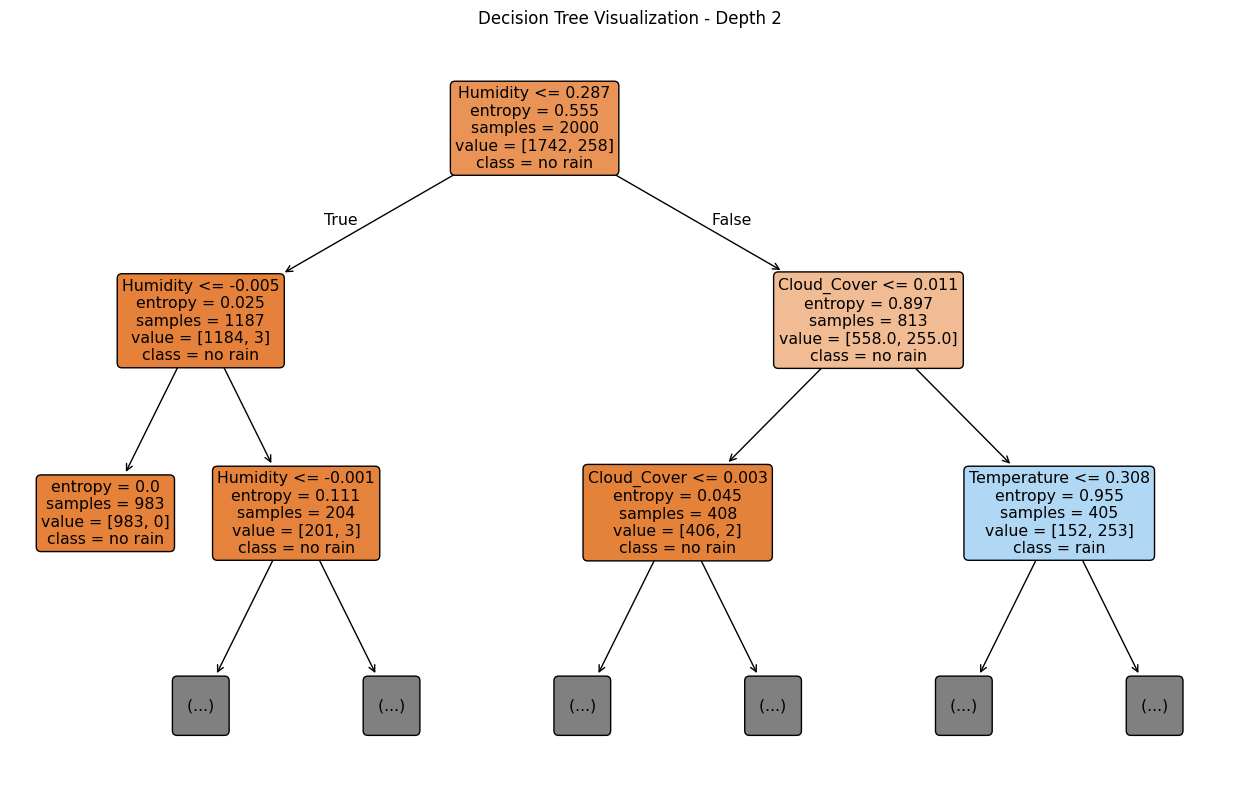

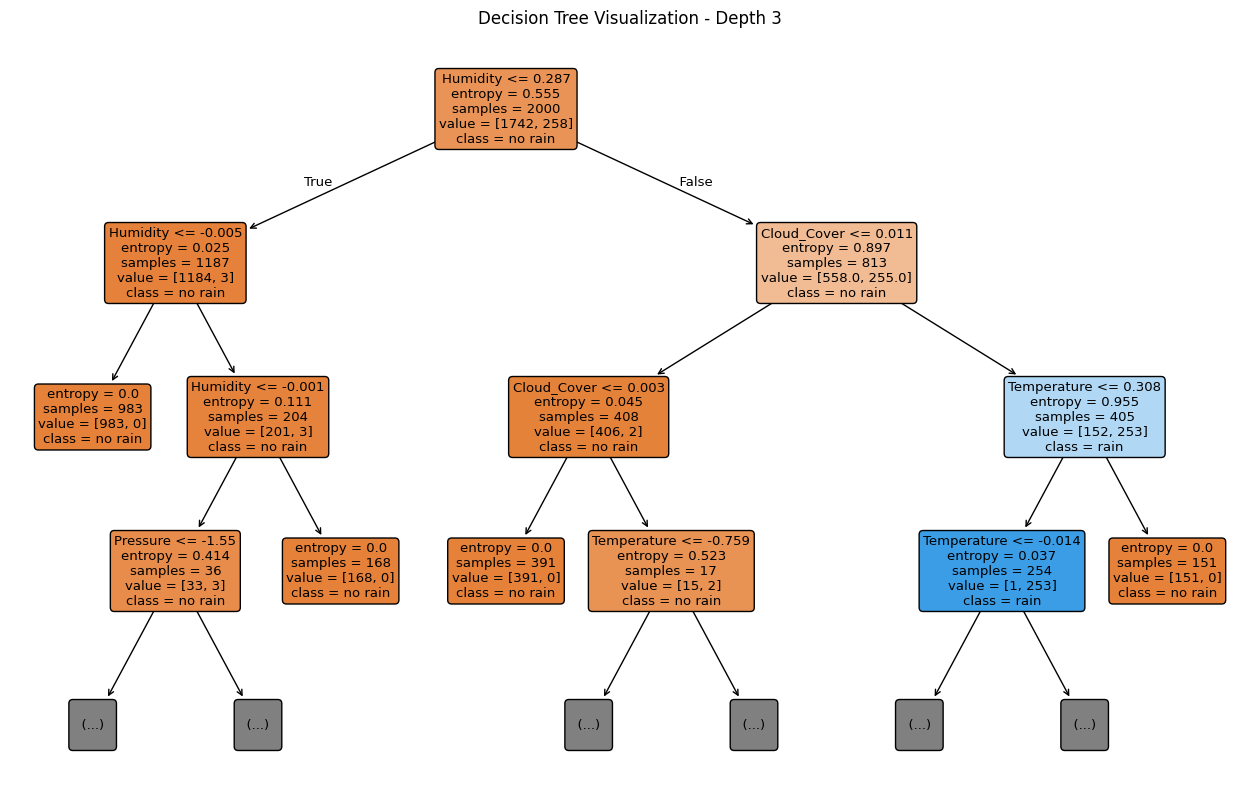

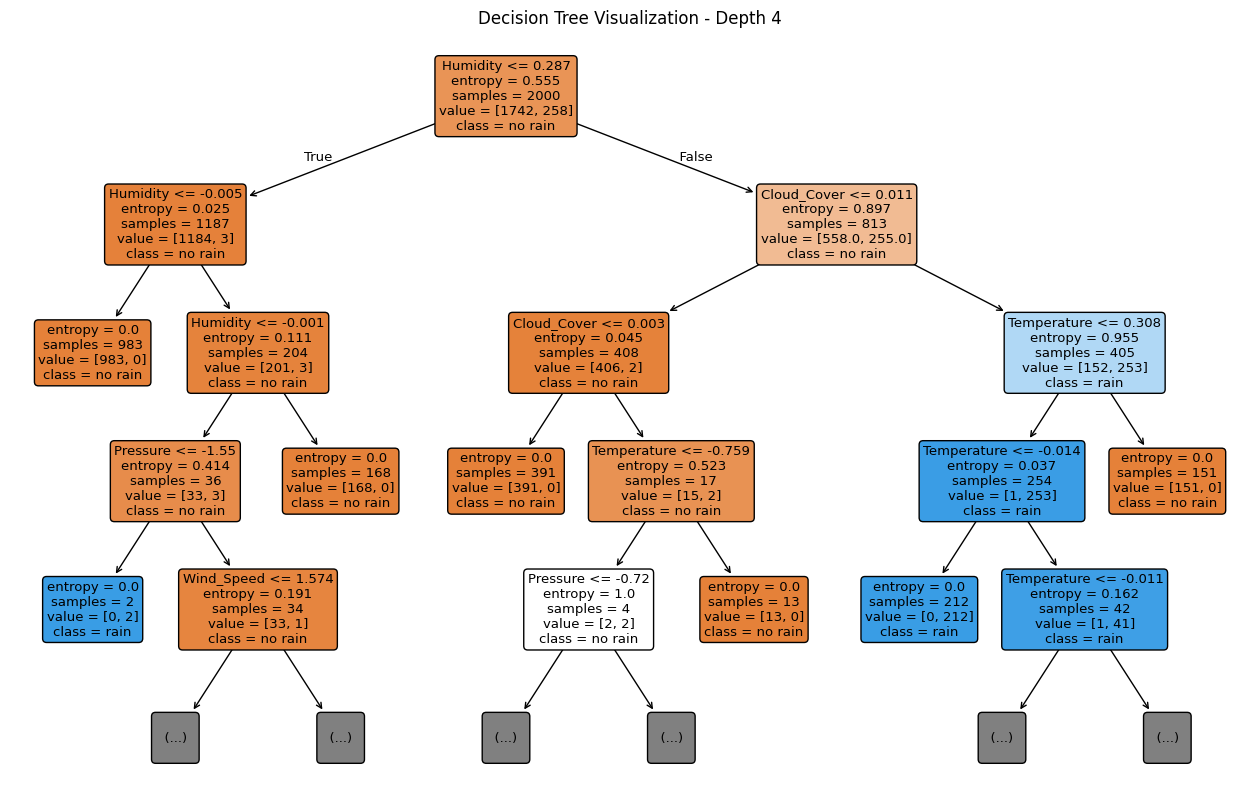

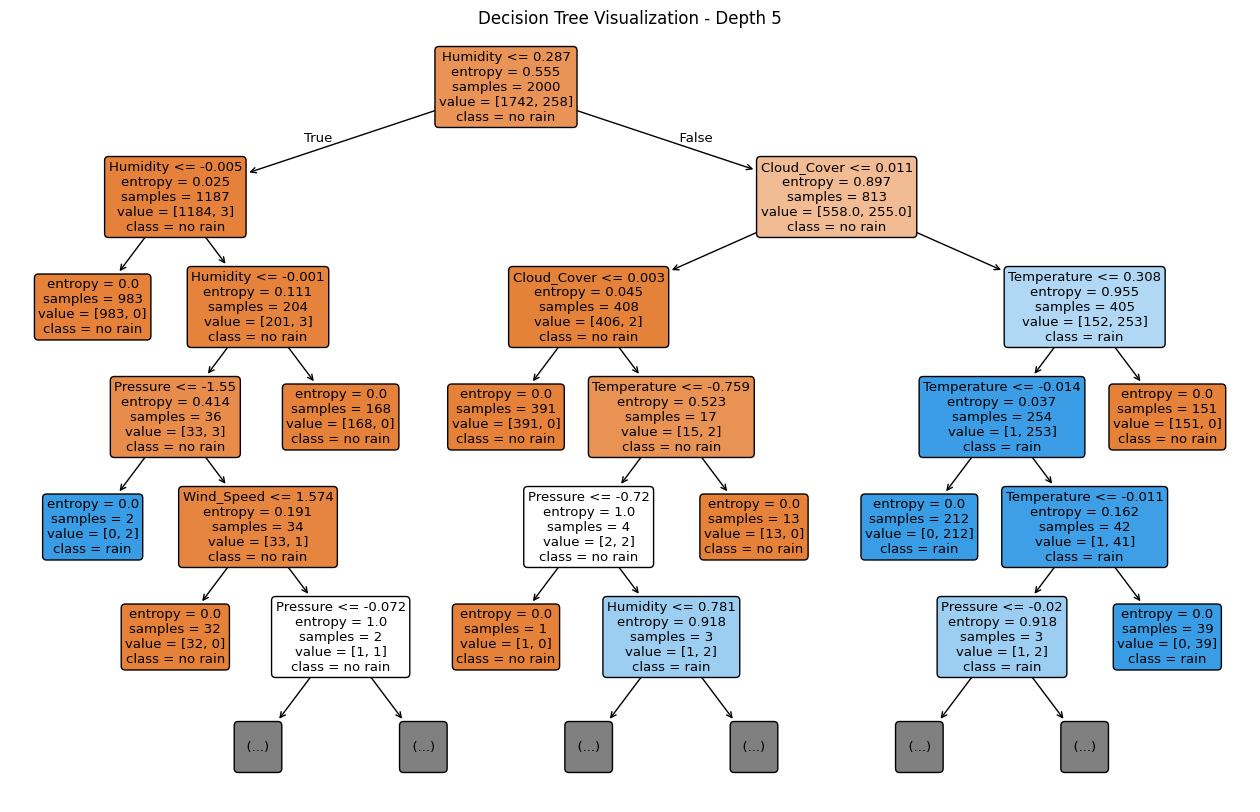

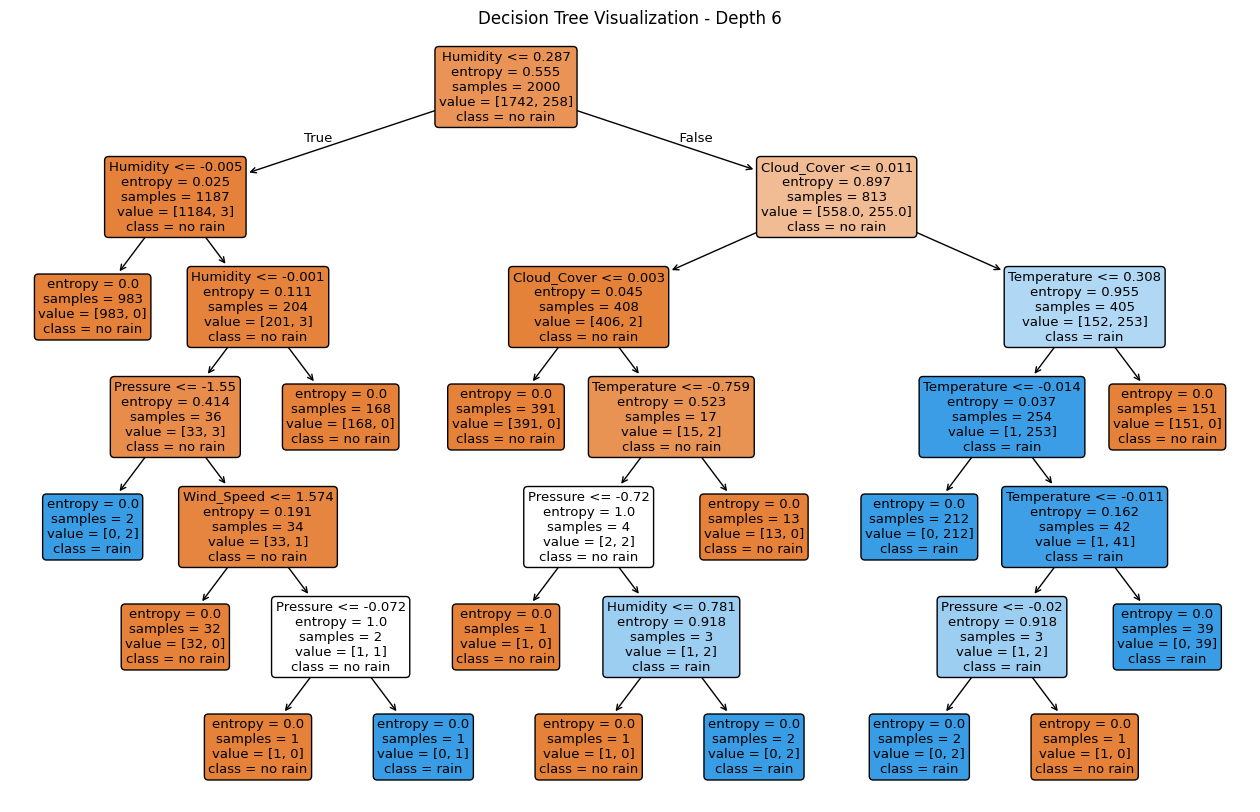

In [72]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=8)
clf.fit(X_train, y_train)

# Visualize the decision tree layer-by-layer
def plot_tree_by_depth(clf, feature_names, max_depth):
    for depth in range(1, max_depth + 1):
        plt.figure(figsize=(16, 10))
        plot_tree(clf, max_depth=depth, feature_names=feature_names, 
                  class_names=label_encoder.classes_, filled=True, rounded=True)
        plt.title(f"Decision Tree Visualization - Depth {depth}")
        plt.show()

tree_max_depth = clf.get_depth()

plot_tree_by_depth(clf, X_train.columns, max_depth=tree_max_depth)



### **Layer-by-Layer Analysis**

#### **Root Node (Depth 0):**
- **Feature Used**: Humidity
- **Threshold**: Humidity <= 0.287
- **Samples**: 2000
- **Class Distribution**: [1742, 258] (1742 samples of `No`, 258 samples of `Yes`)
- **Entropy**: 0.555
- **Majority Class**: No

At this level, the dataset is split into two branches:
- **Left Branch (True)**: Humidity <= 0.287 (1187 samples)
- **Right Branch (False)**: Humidity > 0.287 (813 samples)

---

#### **Depth 1**:
**Left Branch (Humidity <= 0.287):**
- **Feature Used**: Humidity
- **Threshold**: Humidity <= -0.005
- **Samples**: 1187
- **Entropy**: 0.025
- **Majority Class**: No

This branch is further split based on humidity:
- **Left Child (True)**: All 983 samples are classified as `No`.
- **Right Child (False)**: Remaining samples (204) continue splitting.

**Right Branch (Humidity > 0.287):**
- **Feature Used**: Cloud Cover
- **Threshold**: Cloud Cover <= 0.011
- **Samples**: 813
- **Entropy**: 0.897
- **Class Distribution**: [558, 255]

This branch splits further:
- **Left Child (True)**: Cloud Cover <= 0.011 (408 samples)
- **Right Child (False)**: Cloud Cover > 0.011 (405 samples)

---

#### **Depth 2**:
**For Left Branch of Humidity <= 0.287:**
- Nodes with homogeneous data stop splitting (entropy = 0). Example:
  - The first left node contains 983 samples, all of which are `No`.

**For Cloud Cover Branch:**
- Left Child (Cloud Cover <= 0.011):
  - Splits further using **Pressure <= -1.55** and other thresholds.

- Right Child (Cloud Cover > 0.011):
  - Splits further based on **Temperature <= 0.308**.

---

#### **Depth 3-6 (Leaf Nodes)**:
At deeper levels, the tree continues to split until it achieves complete homogeneity or reaches the maximum depth. For example:
- **Leaf Node (Entropy = 0)**: Indicates pure nodes, where all samples belong to one class.
- **Class Predictions**:
  - Each leaf node represents a prediction (`Yes` or `No`), based on the majority class within that node.

---

### **How the Tree Makes Predictions**
1. A sample is passed through the tree, starting from the root.
2. At each internal node:
   - The sample's feature value is compared with the threshold (e.g., `Humidity <= 0.287`).
   - Depending on the result, the sample is directed to the left or right child.
3. This process continues until the sample reaches a leaf node.
4. The predicted class is the majority class of the samples in that leaf.



In [73]:
import numpy as np
import pandas as pd



def explain_prediction(clf, sample, feature_names):
    tree = clf.tree_
    
    print(f"Decision path for the sample: {sample}")
    print("Step-by-step explanation of the prediction:")
    
    node = 0  
    while tree.children_left[node] != tree.children_right[node]:  
        feature_index = tree.feature[node]
        threshold = tree.threshold[node]
        feature_name = feature_names[feature_index]
        
        # Make the decision
        if sample[feature_index] <= threshold:
            print(f"At node {node}, feature '{feature_name}' <= {threshold:.2f} (Sample value: {sample[feature_index]:.2f})")
            node = tree.children_left[node]  # Go to the left child
        else:
            print(f"At node {node}, feature '{feature_name}' > {threshold:.2f} (Sample value: {sample[feature_index]:.2f})")
            node = tree.children_right[node]  # Go to the right child

    predicted_class = np.argmax(tree.value[node])  # Majority class in leaf node
    print(f"Predicted class: {label_encoder.classes_[predicted_class]}")


sample = X.iloc[0].values  
explain_prediction(clf, sample, X.columns)
print("_________________________________")
sample = X.iloc[912].values  
explain_prediction(clf, sample, X.columns)


Decision path for the sample: [ 19.09611938  71.65172311  14.7823241   48.69925686 987.95476009]
Step-by-step explanation of the prediction:
At node 0, feature 'Humidity' > 0.29 (Sample value: 71.65)
At node 12, feature 'Cloud_Cover' > 0.01 (Sample value: 48.70)
At node 22, feature 'Temperature' > 0.31 (Sample value: 19.10)
Predicted class: no rain
_________________________________
Decision path for the sample: [  31.0730278    82.28552193   13.53403093   36.01892932 1046.05502965]
Step-by-step explanation of the prediction:
At node 0, feature 'Humidity' > 0.29 (Sample value: 82.29)
At node 12, feature 'Cloud_Cover' > 0.01 (Sample value: 36.02)
At node 22, feature 'Temperature' > 0.31 (Sample value: 31.07)
Predicted class: no rain


#### Feature Importance Across Desion Tree

|--- Humidity <= 0.29
|   |--- Humidity <= -0.00
|   |   |--- class: 0
|   |--- Humidity >  -0.00
|   |   |--- Humidity <= -0.00
|   |   |   |--- Pressure <= -1.55
|   |   |   |   |--- class: 1
|   |   |   |--- Pressure >  -1.55
|   |   |   |   |--- Wind_Speed <= 1.57
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Wind_Speed >  1.57
|   |   |   |   |   |--- Pressure <= -0.07
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Pressure >  -0.07
|   |   |   |   |   |   |--- class: 1
|   |   |--- Humidity >  -0.00
|   |   |   |--- class: 0
|--- Humidity >  0.29
|   |--- Cloud_Cover <= 0.01
|   |   |--- Cloud_Cover <= 0.00
|   |   |   |--- class: 0
|   |   |--- Cloud_Cover >  0.00
|   |   |   |--- Temperature <= -0.76
|   |   |   |   |--- Pressure <= -0.72
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pressure >  -0.72
|   |   |   |   |   |--- Humidity <= 0.78
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Humidity >  0.78
|   |   |   |   |   |  

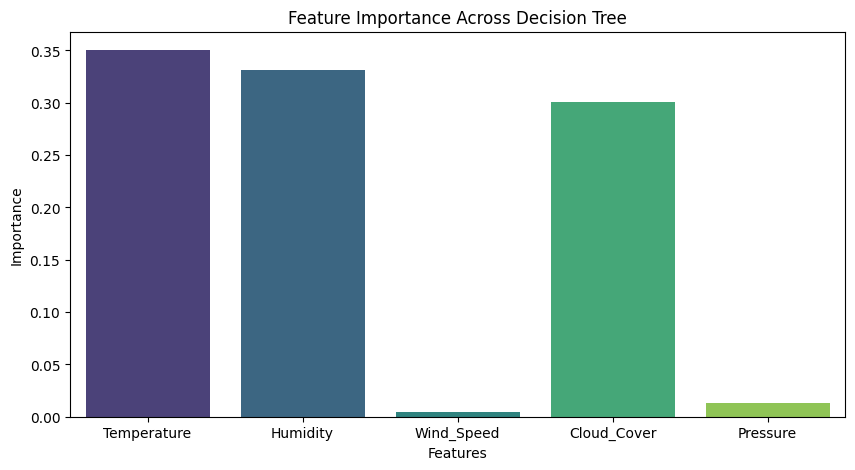

In [74]:
import numpy as np
from sklearn.tree import export_text

tree_text = export_text(clf, feature_names=list(X_train.columns))
print(tree_text) 

importances = clf.feature_importances_
features = X_train.columns
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=importances, palette="viridis")
plt.title("Feature Importance Across Decision Tree")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

### **3.Performance Metrics Report**


#### Knn using Sckit learn with different 5 k

Accuracy of the KNN model on the test set: 0.9700
Classification Report for Knn_using_built_in_while_k_is_3:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       444
           1       0.89      0.84      0.86        56

    accuracy                           0.97       500
   macro avg       0.93      0.91      0.92       500
weighted avg       0.97      0.97      0.97       500



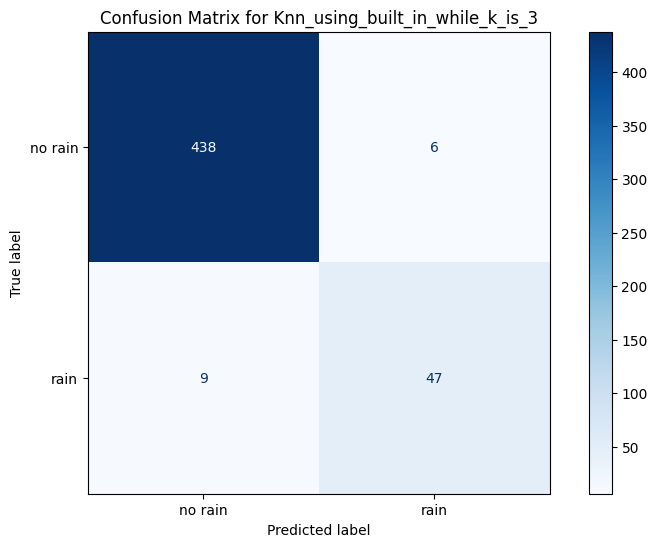

Accuracy of the KNN model on the test set: 0.9680
Classification Report for Knn_using_built_in_while_k_is_5:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       444
           1       0.92      0.79      0.85        56

    accuracy                           0.97       500
   macro avg       0.95      0.89      0.91       500
weighted avg       0.97      0.97      0.97       500



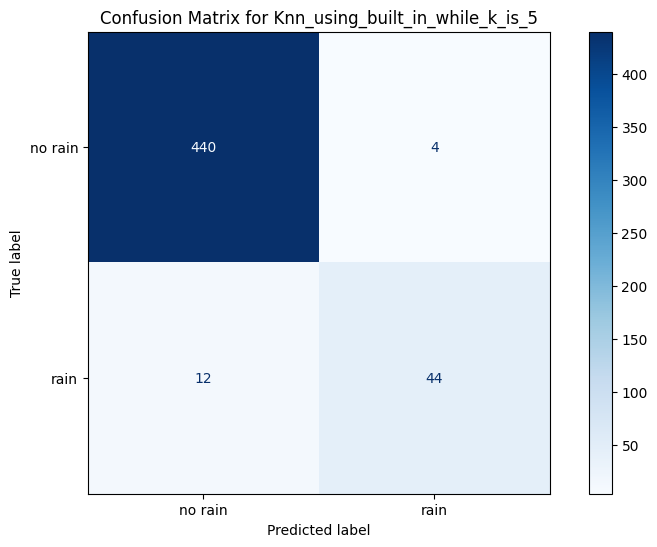

Accuracy of the KNN model on the test set: 0.9660
Classification Report for Knn_using_built_in_while_k_is_7:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       444
           1       0.88      0.80      0.84        56

    accuracy                           0.97       500
   macro avg       0.93      0.90      0.91       500
weighted avg       0.97      0.97      0.97       500



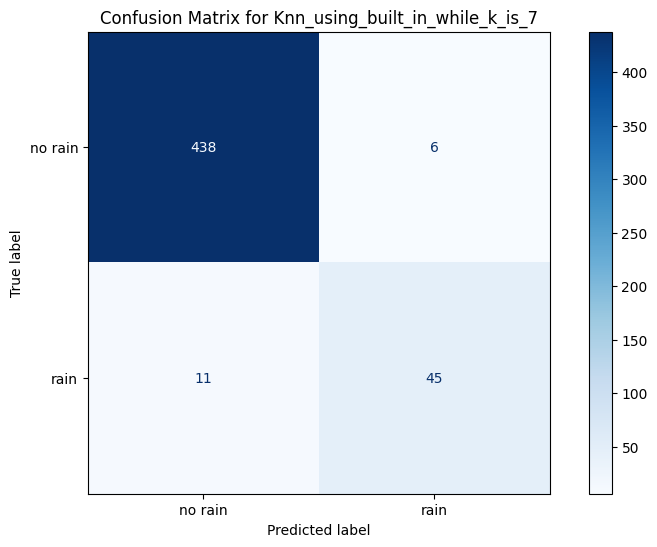

Accuracy of the KNN model on the test set: 0.9700
Classification Report for Knn_using_built_in_while_k_is_9:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       444
           1       0.90      0.82      0.86        56

    accuracy                           0.97       500
   macro avg       0.94      0.91      0.92       500
weighted avg       0.97      0.97      0.97       500



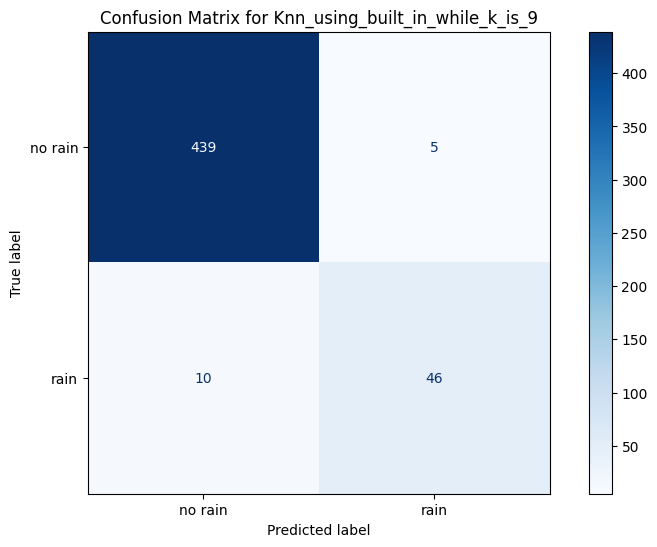

Accuracy of the KNN model on the test set: 0.9720
Classification Report for Knn_using_built_in_while_k_is_11:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       444
           1       0.90      0.84      0.87        56

    accuracy                           0.97       500
   macro avg       0.94      0.91      0.93       500
weighted avg       0.97      0.97      0.97       500



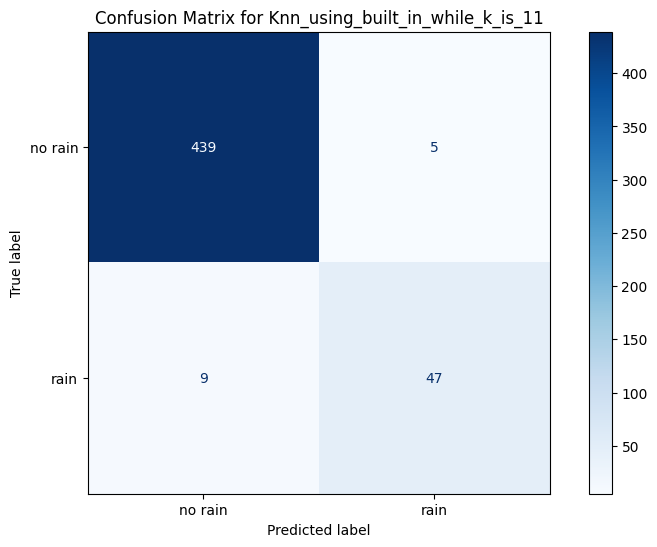

In [75]:
for k in range(3, 12, 2):
    y_pred_knn = Knn(X_train, X_test, y_train, y_test, k)  
    print_classification_report(f"Knn_using_built_in_while_k_is_{k}", y_test, y_pred_knn)  
    plot_confusion_matrix(f"Knn_using_built_in_while_k_is_{k}", y_test, y_pred_knn)  


### Summary Table:

| **k Value** | **Accuracy** | **Precision (No Rain)** | **Precision (Rain)** | **Recall (No Rain)** | **Recall (Rain)** | **F1-Score (Rain)** | **False Positives (No Rain)** | **False Negatives (Rain)** |
|-------------|--------------|-------------------------|----------------------|----------------------|-------------------|---------------------|-----------------------------|----------------------------|
| **3**       | 0.9700       | 0.97                    | 0.88                 | 0.99                 | 0.84              | 0.86                | 4                           | 9                          |
| **5**       | 0.9680       | 0.97                    | 0.92                 | 0.99                 | 0.79              | 0.83                | 4                           | 12                         |
| **7**       | 0.9660       | 0.97                    | 0.90                 | 0.99                 | 0.80              | 0.84                | 5                           | 11                         |
| **9**       | 0.9700       | 0.97                    | 0.90                 | 0.99                 | 0.82              | 0.86                | 5                           | 10                         |
| **11**      | 0.9720       | 0.97                    | 0.90                 | 0.99                 | 0.84              | 0.87                | 7                           | 9                          |

---

### Key Insights:
- **Best accuracy**: \( k = 11 \) with **0.9720**.
- **Best precision (Rain)**: \( k = 5 \) with **0.92**.
- **Best recall (Rain)**: \( k = 11 \) with **0.84**.
- **Best F1-score (Rain)**: \( k = 11 \) with **0.87**.
- **Best false negatives**: \( k = 11 \) with **9**.
- **Best false positives (No Rain)**: \( k = 5 \) with **4**. 



### Accuracy Comparison Plot

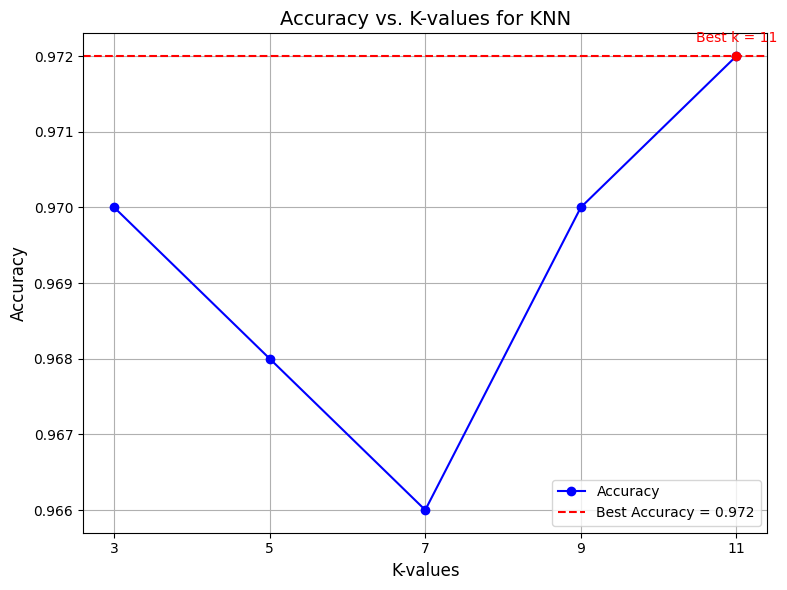

In [76]:
import matplotlib.pyplot as plt

k_values = [3, 5, 7, 9, 11]
accuracies = [0.9700, 0.9680, 0.9660, 0.9700, 0.9720]

best_accuracy = max(accuracies)
best_k = k_values[accuracies.index(best_accuracy)]

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label="Accuracy")
plt.axhline(y=best_accuracy, color='r', linestyle='--', label=f"Best Accuracy = {best_accuracy:.3f}")
plt.scatter([best_k], [best_accuracy], color='red', zorder=5)  

plt.title("Accuracy vs. K-values for KNN", fontsize=14)
plt.xlabel("K-values", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(k_values)  
plt.legend(loc="lower right")
plt.grid(True)

plt.annotate(f"Best k = {best_k}", (best_k, best_accuracy),
             textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()


#### Knn from Scratch with different 5 k

Accuracy of the KNN model from scratch on the test set while_k_is_3: 0.9700
Classification Report for Knn model From Scratch while_k_is_3:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       444
           1       0.89      0.84      0.86        56

    accuracy                           0.97       500
   macro avg       0.93      0.91      0.92       500
weighted avg       0.97      0.97      0.97       500



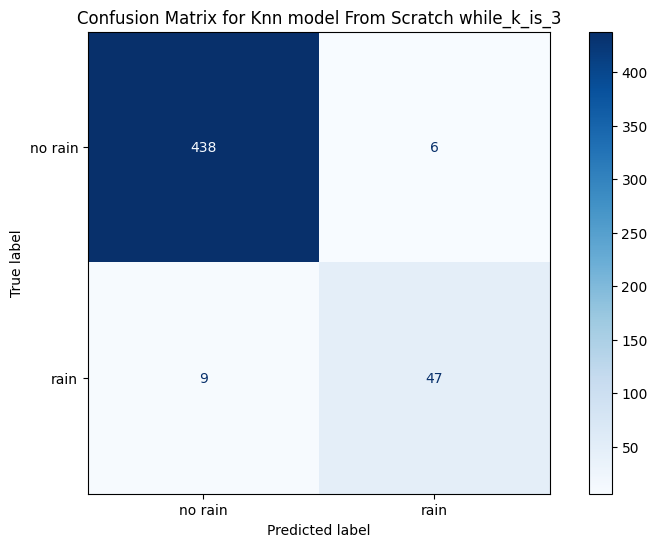

Accuracy of the KNN model from scratch on the test set while_k_is_5: 0.9680
Classification Report for Knn model From Scratch while_k_is_5:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       444
           1       0.92      0.79      0.85        56

    accuracy                           0.97       500
   macro avg       0.95      0.89      0.91       500
weighted avg       0.97      0.97      0.97       500



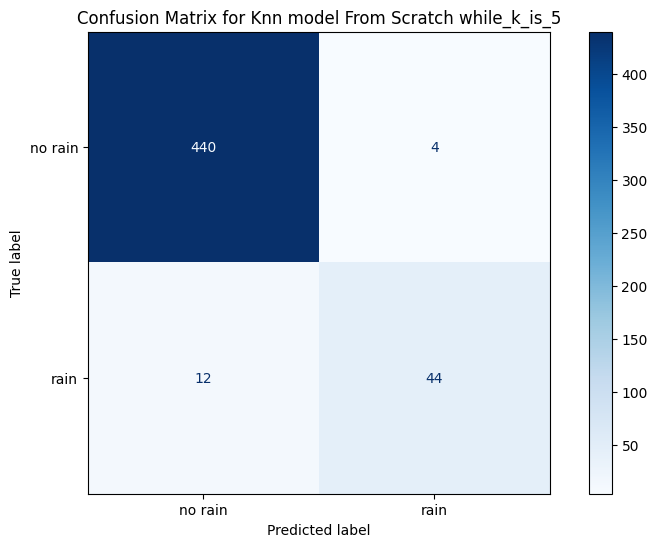

Accuracy of the KNN model from scratch on the test set while_k_is_7: 0.9660
Classification Report for Knn model From Scratch while_k_is_7:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       444
           1       0.88      0.80      0.84        56

    accuracy                           0.97       500
   macro avg       0.93      0.90      0.91       500
weighted avg       0.97      0.97      0.97       500



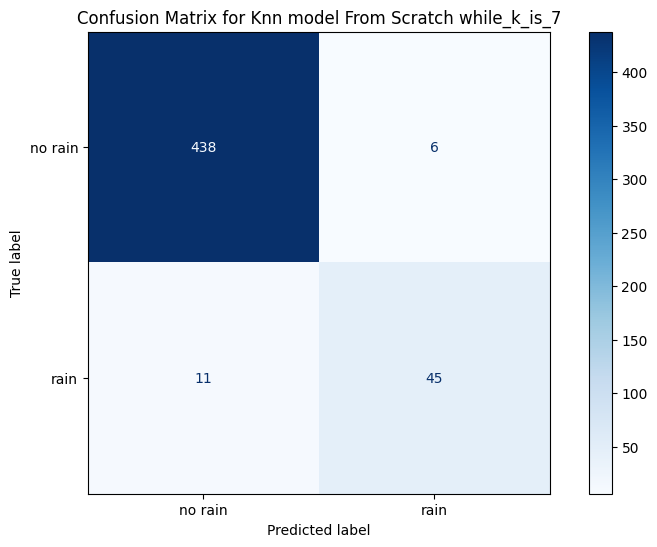

Accuracy of the KNN model from scratch on the test set while_k_is_9: 0.9700
Classification Report for Knn model From Scratch while_k_is_9:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       444
           1       0.90      0.82      0.86        56

    accuracy                           0.97       500
   macro avg       0.94      0.91      0.92       500
weighted avg       0.97      0.97      0.97       500



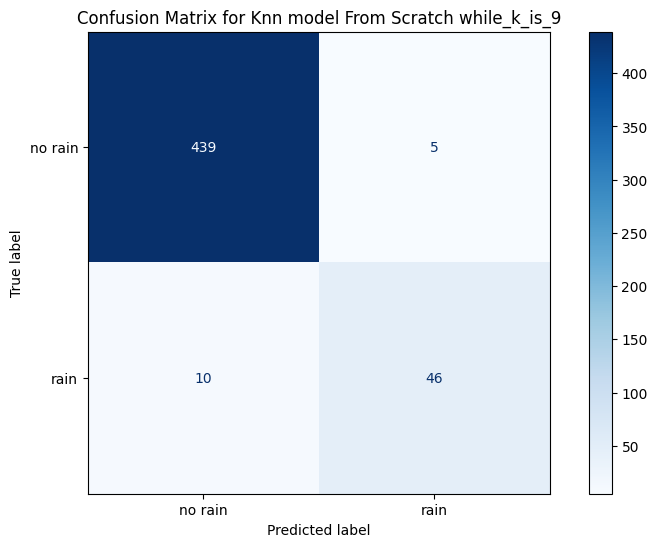

Accuracy of the KNN model from scratch on the test set while_k_is_11: 0.9720
Classification Report for Knn model From Scratch while_k_is_11:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       444
           1       0.90      0.84      0.87        56

    accuracy                           0.97       500
   macro avg       0.94      0.91      0.93       500
weighted avg       0.97      0.97      0.97       500



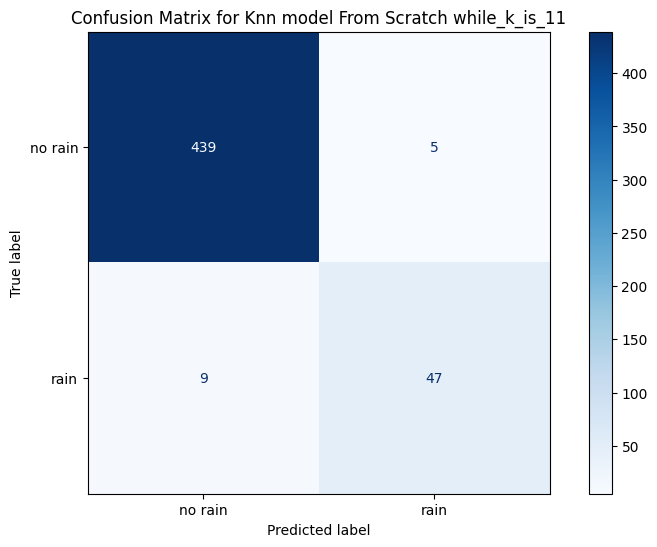

In [77]:
for k in range(3,12,2):
    knn_model = initialize_knn(k)
    fit_knn(knn_model, X_train, np.array(y_train).ravel())
    y_pred_knn_from_Scratch = predict_knn(knn_model, X_test)
    accuracy = accuracy_score(y_test, y_pred_knn_from_Scratch)
    print(f'Accuracy of the KNN model from scratch on the test set while_k_is_{k}: {accuracy:.4f}')
    print_classification_report(f"Knn model From Scratch while_k_is_{k}",y_test,y_pred_knn_from_Scratch)
    plot_confusion_matrix(f"Knn model From Scratch while_k_is_{k}",y_test,y_pred_knn_from_Scratch)
    



| **k Value** | **Accuracy** | **Precision (No Rain)** | **Precision (Rain)** | **Recall (No Rain)** | **Recall (Rain)** | **F1-Score (Rain)** | **False Positives (No Rain)** | **False Negatives (Rain)** |
|-------------|--------------|-------------------------|----------------------|----------------------|-------------------|---------------------|-----------------------------|----------------------------|
| **3**       | 0.9700       | 0.97                    | 0.89                 | 0.99                 | 0.84              | 0.86                | 6                           | 9                          |
| **5**       | 0.9680       | 0.97                    | 0.92                 | 0.99                 | 0.79              | 0.83                | 4                           | 12                         |
| **7**       | 0.9660       | 0.97                    | 0.88                 | 0.99                 | 0.80              | 0.84                | 6                           | 11                         |
| **9**       | 0.9700       | 0.97                    | 0.90                 | 0.99                 | 0.82              | 0.86                | 5                           | 10                         |
| **11**      | 0.9720       | 0.97                    | 0.90                 | 0.99                 | 0.84              | 0.87                | 5                           | 9                          |

---

### Key Insights:

* **Best accuracy**: \(k=11\) with **0.9720**.
* **Best precision (Rain)**: \(k=5\) with **0.92**.
* **Best recall (Rain)**: \(k=11\) with **0.84**.
* **Best F1-score (Rain)**: \(k=11\) with **0.87**.
* **Best false negatives**: \(k=11\) with **9**.
* **Best false positives (No Rain)**: \(k=5\) with **4**.

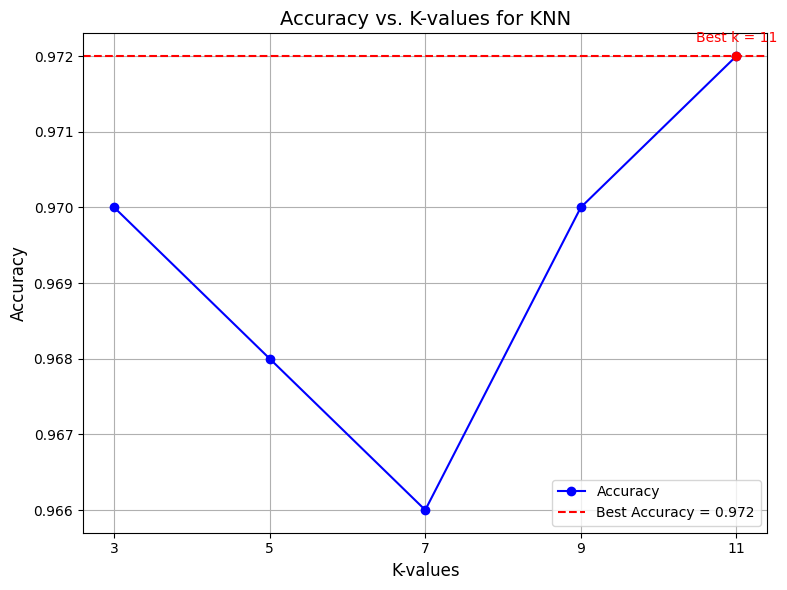

In [78]:
import matplotlib.pyplot as plt

k_values = [3, 5, 7, 9, 11]
accuracies = [0.9700, 0.9680, 0.9660, 0.9700, 0.9720]
best_accuracy = max(accuracies)
best_k = k_values[accuracies.index(best_accuracy)]

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label="Accuracy")
plt.axhline(y=best_accuracy, color='r', linestyle='--', label=f"Best Accuracy = {best_accuracy:.3f}")
plt.scatter([best_k], [best_accuracy], color='red', zorder=5)  

plt.title("Accuracy vs. K-values for KNN", fontsize=14)
plt.xlabel("K-values", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(k_values)  
plt.legend(loc="lower right")
plt.grid(True)

plt.annotate(f"Best k = {best_k}", (best_k, best_accuracy),
             textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()



Comaprison Between Knn buikt in and Knn implemented From Scratch
### **1. Accuracy:**
- Both results report the **same accuracy** for each \(k\)-value. 
    - The highest accuracy is consistently observed at \(k=11\) with **0.9720**.

### **2. Precision (Rain):**
- The **precision for Rain** is the same in both results:
  - \(k=5\) has the highest precision at **0.92**.

### **3. Recall (Rain):**
- Both results show the **same recall for Rain**:
  - The highest recall for Rain is observed at \(k=11\) with **0.84**.

### **4. F1-Score (Rain):**
- Both results report the **same F1-score for Rain**:
  - The highest F1-score for Rain is at \(k=11\) with **0.87**.

### **5. False Positives (No Rain):**
- The **false positives** for No Rain are identical across both results:
  - \(k=5\) has the lowest false positives at **4**.

### **6. False Negatives (Rain):**
- Both results show the **same false negatives for Rain**:
  - \(k=11\) has the lowest false negatives at **9**.

---
There are **no differences** in the analysis, metrics, or key insights between the two results. The values and the interpretation are **identical** in both tables.

